# Мастерская

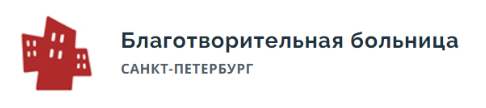

https://charityhospital.ru/

**Выполнил:** Дедков А.Е.

Презентация: https://disk.yandex.ru/i/RXCqaJAieoistw

**Описание:** НКО "Благотворительная больница" оказывает медико-социальную помощь бездомным людям Петербурга с 2018 года.
Заказчики уже долгое время сотрудничают с Мастерской Практикума в направлении маркетинга и предоставили нам все имеющиеся данные с просьбой извлечь из них максимум пользы.


**Цель проекта:**  в течение 2х недель проанализировать эффективность маркетингового подхода на основе данных о пожертвованиях и рекламных кампаниях.

**1.Загрузка и подготовка данных**
- Загрузка и изучение данных
- Переименование столбцов
- Объединение данных
- Удаление дубликатов
- Удаление лишних или пустых колонок
- Преобразование типов данных
- Обработка пропусков

**2.Анализ данных**
- Клиенты
- Конверсия
- Анализ рекламных кампаний

**3.Выводы и рекомендации**

**4.Подготовка презентации**


#1.Загрузка и подготовка данных

##1.1 Загрузка и изучение данных

In [ ]:
! gdown  1atV6v6SMhOV0ExsoWvhy1HG9E6JnU_mx

Downloading...
From: https://drive.google.com/uc?id=1atV6v6SMhOV0ExsoWvhy1HG9E6JnU_mx
To: /content/data.zip
100% 2.99M/2.99M [00:00<00:00, 214MB/s]


In [ ]:
! unzip /content/data.zip

Archive:  /content/data.zip
replace data/clients.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
#imports
import pandas as pd
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt

In [ ]:
df_ad_ch_hospital_1 = pd.read_csv('/content/data/2022-07-19_2023-07-19_adgrants-charityhospital (1).csv', sep=';', nrows=2)
df_ad_ch_hospital_2 = pd.read_csv('/content/data/2022-07-19_2023-07-19_adgrants-charityhospital (1).csv', sep=';', skiprows=4)
df_clients = pd.read_excel('/content/data/clients.xlsx')
df_donors = pd.read_excel('/content/data/donors (1).xlsx')

In [ ]:
df_ad_ch_hospital_1.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"Клиент АНО медико-социальной помощи «Благотворительная больница» (adgrants-charityhospital), период 19.07.2022 - 19.07.2023"
Всего,NaN,Ср.расход за день (руб.),Показы,Взвешенные показы,Клики,CTR (%),wCTR (%),Расход (руб.),Ср. цена клика (руб.),Ср. ставка за клик (руб.),Ср. позиция показов,Ср. объём трафика,Ср. позиция кликов,Отказы (%),Ср. цена тыс. показов (руб.),Глубина (стр.),Конверсия (%),Цена цели (руб.),Конверсии,Рентабельность,Доля рекламных расходов,Доход (руб.),Прибыль (руб.),Сумма ВC,Цена ВC (руб.),Доля ВC (%),Проигрывание 25% ролика,Проигрывание 50% ролика,Проигрывание 75% ролика,Проигрывание 100% ролика,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
с 19.07.2022 по 19.07.2023,NaN,"5468,02",9853586,"9853586,00",41243,"0,42","0,42","825670,64","20,02","29,15",-,"100,00",-,"37,05","83,79","1,21","1,19","1678,19",492,"-0,20","124,61","662600,00","-163070,64","112,55","7336,19","0,27",117682,83308,69513,62947,"1,19","0,85","0,71","0,64","13,1169",7348,11157,0,"100,00","39,71"


In [ ]:
df_ad_ch_hospital_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2 entries, ('Всего', nan, 'Ср.расход за день (руб.)', 'Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)', 'Расход (руб.)', 'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)', 'Ср. позиция показов', 'Ср. объём трафика', 'Ср. позиция кликов', 'Отказы (%)', 'Ср. цена тыс. показов (руб.)', 'Глубина (стр.)', 'Конверсия (%)', 'Цена цели (руб.)', 'Конверсии', 'Рентабельность', 'Доля рекламных расходов', 'Доход (руб.)', 'Прибыль (руб.)', 'Сумма ВC', 'Цена ВC (руб.)', 'Доля ВC (%)', 'Проигрывание 25% ролика', 'Проигрывание 50% ролика', 'Проигрывание 75% ролика', 'Проигрывание 100% ролика', 'Доля проигрываний 25% ролика (%)', 'Доля проигрываний 50% ролика (%)', 'Доля проигрываний 75% ролика (%)', 'Доля проигрываний 100% ролика (%)', 'Ср. цена досмотра 100% ролика (руб.)', 'Видимые показы, стандарт MRC', 'Невидимые показы, стандарт MRC', 'Неустановленные показы, стандарт MRC', 'Доля измеряемых показов, стандарт MRC (%)') to ('с 19.07.

In [ ]:
df_ad_ch_hospital_2.head()

,Дата,Кампания,№ Кампании,Метка,Условие показа,Пол,Уровень платежеспособности,Возраст,Показы,Взвешенные показы,...,Доля проигрываний 25% ролика (%),Доля проигрываний 50% ролика (%),Доля проигрываний 75% ролика (%),Доля проигрываний 100% ролика (%),Ср. цена досмотра 100% ролика (руб.),"Видимые показы, стандарт MRC","Невидимые показы, стандарт MRC","Неустановленные показы, стандарт MRC","Доля измеряемых показов, стандарт MRC (%)","Доля видимых показов, стандарт MRC (%)"
0,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,не определен,7,"7,00",...,-,-,-,-,-,-,-,-,-,-
1,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,младше 18,4,"4,00",...,-,-,-,-,-,-,-,-,-,-
2,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,18-24,2,"2,00",...,-,-,-,-,-,-,-,-,-,-
3,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
4,15.01.2023,Команда#2 / Бот / СПб,82164908,без метки,благотворительность,не определен,Остальные,35-44,1,"1,00",...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df_ad_ch_hospital_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308023 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   Дата                                       308023 non-null  object
 1   Кампания                                   308023 non-null  object
 2   № Кампании                                 308023 non-null  int64 
 3   Метка                                      308023 non-null  object
 4   Условие показа                             308023 non-null  object
 5   Пол                                        308023 non-null  object
 6   Уровень платежеспособности                 308023 non-null  object
 7   Возраст                                    308023 non-null  object
 8   Показы                                     308023 non-null  int64 
 9   Взвешенные показы                          308023 non-null  object
 10  Клики               

In [ ]:
df_clients.head()

,id,Первый платеж,Подписки вкл,Подписки выкл,Типы оплаты,Платежей за год,Сумма за год,Средний платеж в год,Всего платежей,Сумма всего,Средний платеж,Сумма за месяц,Страны,Регионы,Последний платеж,код
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,500,1,500,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1000,1,1000,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122


In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   Первый платеж         1166 non-null   datetime64[ns]
 2   Подписки вкл          1166 non-null   int64         
 3   Подписки выкл         1166 non-null   int64         
 4   Типы оплаты           998 non-null    object        
 5   Платежей за год       1166 non-null   int64         
 6   Сумма за год          1166 non-null   int64         
 7   Средний платеж в год  1166 non-null   object        
 8   Всего платежей        1166 non-null   int64         
 9   Сумма всего           1166 non-null   int64         
 10  Средний платеж        1166 non-null   object        
 11  Сумма за месяц        1166 non-null   int64         
 12  Страны                922 non-null    object        
 13  Регионы           

In [ ]:
df_donors.head()

,ID,Тип донора,Дата первого пожертвования,Сумма первого пожертвования,Кампания первого пожертвования,Метки донора,Кампании,Платёжные операторы,Дата последнего пожертвования,Сумма последнего пожертвования,Кампания последнего пожертвования,Общая сумма пожертвований,Валюта,Код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,NaN,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


In [ ]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 813 non-null    int64  
 1   Тип донора                         813 non-null    object 
 2   Дата первого пожертвования         795 non-null    object 
 3   Сумма первого пожертвования        795 non-null    float64
 4   Кампания первого пожертвования     795 non-null    object 
 5   Метки донора                       0 non-null      float64
 6   Кампании                           795 non-null    object 
 7   Платёжные операторы                795 non-null    object 
 8   Дата последнего пожертвования      795 non-null    object 
 9   Сумма последнего пожертвования     795 non-null    float64
 10  Кампания последнего пожертвования  795 non-null    object 
 11  Общая сумма пожертвований          813 non-null    int64  

In [ ]:
for i in df_ad_ch_hospital_1.columns:
    k = df_ad_ch_hospital_1[i].isnull().sum()
    if k > 0:
        print(f'{i}: {round(k/len(df_ad_ch_hospital_1), 2)} (доля)')

In [ ]:
for i in df_ad_ch_hospital_2.columns:
    k = df_ad_ch_hospital_2[i].isnull().sum()
    if k > 0:
        print(f'{i}: {round(k/len(df_ad_ch_hospital_2), 2)} (доля)')

In [ ]:
for i in df_donors.columns:
    k = df_donors[i].isnull().sum()
    if k > 0:
        print(f'{i}: {round(k/len(df_donors), 2)} (доля)')

Дата первого пожертвования: 0.02 (доля)
Сумма первого пожертвования: 0.02 (доля)
Кампания первого пожертвования: 0.02 (доля)
Метки донора: 1.0 (доля)
Кампании: 0.02 (доля)
Платёжные операторы: 0.02 (доля)
Дата последнего пожертвования: 0.02 (доля)
Сумма последнего пожертвования: 0.02 (доля)
Кампания последнего пожертвования: 0.02 (доля)


In [ ]:
for i in df_clients.columns:
    k = df_clients[i].isnull().sum()
    if k > 0:
        print(f'{i}: {round(k/len(df_clients), 2)} (доля)')

Типы оплаты: 0.14 (доля)
Страны: 0.21 (доля)
Регионы: 0.23 (доля)


##1.2 Переименование столбцов

In [ ]:
df_ad_ch_hospital_1.columns = [i.lower().strip().replace(' ', '_') for i in df_ad_ch_hospital_1.columns]
df_ad_ch_hospital_2.columns = [i.lower().strip().replace(' ', '_') for i in df_ad_ch_hospital_2.columns]

df_clients.columns = [i.lower().strip().replace(' ', '_') for i in df_clients.columns]
df_donors.columns = [i.lower().strip().replace(' ', '_') for i in df_donors.columns]

In [ ]:
df_ad_ch_hospital_1.columns

Index(['клиент_ано_медико-социальной_помощи_«благотворительная_больница»_(adgrants-charityhospital),_период_19.07.2022_-_19.07.2023'], dtype='object')

In [ ]:
df_ad_ch_hospital_2.columns

Index(['дата', 'кампания', '№_кампании', 'метка', 'условие_показа', 'пол',
       'уровень_платежеспособности', 'возраст', 'показы', 'взвешенные_показы',
       'клики', 'ctr_(%)', 'wctr_(%)', 'расход_(руб.)',
       'ср._цена_клика_(руб.)', 'ср._ставка_за_клик_(руб.)',
       'ср._позиция_показов', 'ср._объём_трафика', 'ср._позиция_кликов',
       'отказы_(%)', 'ср._цена_тыс._показов_(руб.)', 'глубина_(стр.)',
       'конверсия_(%)', 'цена_цели_(руб.)', 'конверсии', 'рентабельность',
       'доля_рекламных_расходов', 'доход_(руб.)', 'прибыль_(руб.)', 'сумма_вc',
       'цена_вc_(руб.)', 'доля_вc_(%)', 'проигрывание_25%_ролика',
       'проигрывание_50%_ролика', 'проигрывание_75%_ролика',
       'проигрывание_100%_ролика', 'доля_проигрываний_25%_ролика_(%)',
       'доля_проигрываний_50%_ролика_(%)', 'доля_проигрываний_75%_ролика_(%)',
       'доля_проигрываний_100%_ролика_(%)',
       'ср._цена_досмотра_100%_ролика_(руб.)', 'видимые_показы,_стандарт_mrc',
       'невидимые_показы,_ста

In [ ]:
df_clients.columns

Index(['id', 'первый_платеж', 'подписки_вкл', 'подписки_выкл', 'типы_оплаты',
       'платежей_за_год', 'сумма_за_год', 'средний_платеж_в_год',
       'всего_платежей', 'сумма_всего', 'средний_платеж', 'сумма_за_месяц',
       'страны', 'регионы', 'последний_платеж', 'код'],
      dtype='object')

In [ ]:
df_donors.columns

Index(['id', 'тип_донора', 'дата_первого_пожертвования',
       'сумма_первого_пожертвования', 'кампания_первого_пожертвования',
       'метки_донора', 'кампании', 'платёжные_операторы',
       'дата_последнего_пожертвования', 'сумма_последнего_пожертвования',
       'кампания_последнего_пожертвования', 'общая_сумма_пожертвований',
       'валюта', 'код'],
      dtype='object')

##1.3 Объединение данных

Решил не объединять данные т.к. получается очень много пустых полей

## 1.4 Удаление дубликатов

In [ ]:
df_ad_ch_hospital_1.duplicated().sum()

0

In [ ]:
df_ad_ch_hospital_2.duplicated().sum()

25

In [ ]:
df_ad_ch_hospital_2[df_ad_ch_hospital_2.duplicated()].head()

,дата,кампания,№_кампании,метка,условие_показа,пол,уровень_платежеспособности,возраст,показы,взвешенные_показы,...,доля_проигрываний_25%_ролика_(%),доля_проигрываний_50%_ролика_(%),доля_проигрываний_75%_ролика_(%),доля_проигрываний_100%_ролика_(%),ср._цена_досмотра_100%_ролика_(руб.),"видимые_показы,_стандарт_mrc","невидимые_показы,_стандарт_mrc","неустановленные_показы,_стандарт_mrc","доля_измеряемых_показов,_стандарт_mrc_(%)","доля_видимых_показов,_стандарт_mrc_(%)"
232316,21.06.2023,РК_Обустройство_клиники,89727699,без метки,Интересы и привычки,мужской,6-10%,25-34,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
232326,21.06.2023,РК_Обустройство_клиники,89727699,без метки,Интересы и привычки,женский,6-10%,старше 55,3,"3,00",...,-,-,-,-,-,-,-,-,-,-
232327,21.06.2023,РК_Обустройство_клиники,89727699,без метки,Интересы и привычки,женский,2-5%,18-24,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
232332,21.06.2023,РК_Обустройство_клиники,89727699,без метки,Интересы и привычки,мужской,Остальные,18-24,1,"1,00",...,-,-,-,-,-,-,-,-,-,-
232333,21.06.2023,РК_Обустройство_клиники,89727699,без метки,Интересы и привычки,мужской,Остальные,25-34,5,"5,00",...,-,-,-,-,-,-,-,-,-,-


In [ ]:
df_ad_ch_hospital_2.duplicated().sum() / len(df_ad_ch_hospital_2)

8.116277031260653e-05

Так как дубликатов довольно мало, удалим их

In [ ]:
df_ad_ch_hospital_2 = df_ad_ch_hospital_2.drop_duplicates()

In [ ]:
df_ad_ch_hospital_2.duplicated().sum()

0

In [ ]:
df_clients.duplicated().sum()

0

In [ ]:
df_donors.duplicated().sum()

0

## 1.5 Удаление лишних или пустых колонок

In [ ]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 813 non-null    int64  
 1   тип_донора                         813 non-null    object 
 2   дата_первого_пожертвования         795 non-null    object 
 3   сумма_первого_пожертвования        795 non-null    float64
 4   кампания_первого_пожертвования     795 non-null    object 
 5   метки_донора                       0 non-null      float64
 6   кампании                           795 non-null    object 
 7   платёжные_операторы                795 non-null    object 
 8   дата_последнего_пожертвования      795 non-null    object 
 9   сумма_последнего_пожертвования     795 non-null    float64
 10  кампания_последнего_пожертвования  795 non-null    object 
 11  общая_сумма_пожертвований          813 non-null    int64  

удалим пустую колонку: метки_донора

In [ ]:
df_donors.drop('метки_донора', axis= 1 , inplace= True )

In [ ]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 813 non-null    int64  
 1   тип_донора                         813 non-null    object 
 2   дата_первого_пожертвования         795 non-null    object 
 3   сумма_первого_пожертвования        795 non-null    float64
 4   кампания_первого_пожертвования     795 non-null    object 
 5   кампании                           795 non-null    object 
 6   платёжные_операторы                795 non-null    object 
 7   дата_последнего_пожертвования      795 non-null    object 
 8   сумма_последнего_пожертвования     795 non-null    float64
 9   кампания_последнего_пожертвования  795 non-null    object 
 10  общая_сумма_пожертвований          813 non-null    int64  
 11  валюта                             813 non-null    object 

## 1.6 Преобразование типов данных

In [ ]:
df_ad_ch_hospital_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2 entries, ('Всего', nan, 'Ср.расход за день (руб.)', 'Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)', 'Расход (руб.)', 'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)', 'Ср. позиция показов', 'Ср. объём трафика', 'Ср. позиция кликов', 'Отказы (%)', 'Ср. цена тыс. показов (руб.)', 'Глубина (стр.)', 'Конверсия (%)', 'Цена цели (руб.)', 'Конверсии', 'Рентабельность', 'Доля рекламных расходов', 'Доход (руб.)', 'Прибыль (руб.)', 'Сумма ВC', 'Цена ВC (руб.)', 'Доля ВC (%)', 'Проигрывание 25% ролика', 'Проигрывание 50% ролика', 'Проигрывание 75% ролика', 'Проигрывание 100% ролика', 'Доля проигрываний 25% ролика (%)', 'Доля проигрываний 50% ролика (%)', 'Доля проигрываний 75% ролика (%)', 'Доля проигрываний 100% ролика (%)', 'Ср. цена досмотра 100% ролика (руб.)', 'Видимые показы, стандарт MRC', 'Невидимые показы, стандарт MRC', 'Неустановленные показы, стандарт MRC', 'Доля измеряемых показов, стандарт MRC (%)') to ('с 19.07.

In [ ]:
df_ad_ch_hospital_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307998 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype 
---  ------                                     --------------   ----- 
 0   дата                                       307998 non-null  object
 1   кампания                                   307998 non-null  object
 2   №_кампании                                 307998 non-null  int64 
 3   метка                                      307998 non-null  object
 4   условие_показа                             307998 non-null  object
 5   пол                                        307998 non-null  object
 6   уровень_платежеспособности                 307998 non-null  object
 7   возраст                                    307998 non-null  object
 8   показы                                     307998 non-null  int64 
 9   взвешенные_показы                          307998 non-null  object
 10  клики               

In [ ]:
df_ad_ch_hospital_2[['взвешенные_показы',
       'клики', 'ctr_(%)', 'wctr_(%)', 'расход_(руб.)',
       'ср._цена_клика_(руб.)', 'ср._ставка_за_клик_(руб.)',
       'ср._позиция_показов', 'ср._объём_трафика', 'ср._позиция_кликов',
       'отказы_(%)', 'ср._цена_тыс._показов_(руб.)', 'глубина_(стр.)',
       'конверсия_(%)', 'цена_цели_(руб.)', 'конверсии', 'рентабельность',
       'доля_рекламных_расходов', 'доход_(руб.)', 'прибыль_(руб.)', 'сумма_вc',
       'цена_вc_(руб.)', 'доля_вc_(%)', 'проигрывание_25%_ролика',
       'проигрывание_50%_ролика', 'проигрывание_75%_ролика',
       'проигрывание_100%_ролика', 'доля_проигрываний_25%_ролика_(%)',
       'доля_проигрываний_50%_ролика_(%)', 'доля_проигрываний_75%_ролика_(%)',
       'доля_проигрываний_100%_ролика_(%)',
       'ср._цена_досмотра_100%_ролика_(руб.)', 'видимые_показы,_стандарт_mrc',
       'невидимые_показы,_стандарт_mrc',
       'неустановленные_показы,_стандарт_mrc',
       'доля_измеряемых_показов,_стандарт_mrc_(%)',
       'доля_видимых_показов,_стандарт_mrc_(%)']].tail()

,взвешенные_показы,клики,ctr_(%),wctr_(%),расход_(руб.),ср._цена_клика_(руб.),ср._ставка_за_клик_(руб.),ср._позиция_показов,ср._объём_трафика,ср._позиция_кликов,...,доля_проигрываний_25%_ролика_(%),доля_проигрываний_50%_ролика_(%),доля_проигрываний_75%_ролика_(%),доля_проигрываний_100%_ролика_(%),ср._цена_досмотра_100%_ролика_(руб.),"видимые_показы,_стандарт_mrc","невидимые_показы,_стандарт_mrc","неустановленные_показы,_стандарт_mrc","доля_измеряемых_показов,_стандарт_mrc_(%)","доля_видимых_показов,_стандарт_mrc_(%)"
308018,"2,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,...,-,-,-,-,-,-,-,-,-,-
308019,"3,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,...,-,-,-,-,-,-,-,-,-,-
308020,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,...,-,-,-,-,-,-,-,-,-,-
308021,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,...,-,-,-,-,-,-,-,-,-,-
308022,"1,00",0,"0,00","0,00","0,00",-,-,-,"100,00",-,...,-,-,-,-,-,-,-,-,-,-


In [ ]:
list_col = ['взвешенные_показы',
       'клики', 'ctr_(%)', 'wctr_(%)', 'расход_(руб.)',
       'ср._цена_клика_(руб.)', 'ср._ставка_за_клик_(руб.)',
       'ср._позиция_показов', 'ср._объём_трафика', 'ср._позиция_кликов',
       'отказы_(%)', 'ср._цена_тыс._показов_(руб.)', 'глубина_(стр.)',
       'конверсия_(%)', 'цена_цели_(руб.)', 'конверсии', 'рентабельность',
       'доля_рекламных_расходов', 'доход_(руб.)', 'прибыль_(руб.)', 'сумма_вc',
       'цена_вc_(руб.)', 'доля_вc_(%)', 'проигрывание_25%_ролика',
       'проигрывание_50%_ролика', 'проигрывание_75%_ролика',
       'проигрывание_100%_ролика', 'доля_проигрываний_25%_ролика_(%)',
       'доля_проигрываний_50%_ролика_(%)', 'доля_проигрываний_75%_ролика_(%)',
       'доля_проигрываний_100%_ролика_(%)',
       'ср._цена_досмотра_100%_ролика_(руб.)', 'видимые_показы,_стандарт_mrc',
       'невидимые_показы,_стандарт_mrc',
       'неустановленные_показы,_стандарт_mrc',
       'доля_измеряемых_показов,_стандарт_mrc_(%)',
       'доля_видимых_показов,_стандарт_mrc_(%)']

for i in list_col:
  if is_numeric_dtype(df_ad_ch_hospital_2[i]) != 1:
    df_ad_ch_hospital_2[i] = df_ad_ch_hospital_2[i].str.replace(',', '.').str.replace('-', '0')

In [ ]:
for i in list_col:
  if is_numeric_dtype(df_ad_ch_hospital_2[i]) != 1:
    df_ad_ch_hospital_2[i] = df_ad_ch_hospital_2[i].astype(float)

In [ ]:
df_ad_ch_hospital_2['дата'] = pd.to_datetime(df_ad_ch_hospital_2['дата'])

<ipython-input-38-29c216ca0704>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_ad_ch_hospital_2['дата'] = pd.to_datetime(df_ad_ch_hospital_2['дата'])


In [ ]:
df_ad_ch_hospital_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307998 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   дата                                       307998 non-null  datetime64[ns]
 1   кампания                                   307998 non-null  object        
 2   №_кампании                                 307998 non-null  int64         
 3   метка                                      307998 non-null  object        
 4   условие_показа                             307998 non-null  object        
 5   пол                                        307998 non-null  object        
 6   уровень_платежеспособности                 307998 non-null  object        
 7   возраст                                    307998 non-null  object        
 8   показы                                     307998 non-null  int64         
 9   взве

In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   первый_платеж         1166 non-null   datetime64[ns]
 2   подписки_вкл          1166 non-null   int64         
 3   подписки_выкл         1166 non-null   int64         
 4   типы_оплаты           998 non-null    object        
 5   платежей_за_год       1166 non-null   int64         
 6   сумма_за_год          1166 non-null   int64         
 7   средний_платеж_в_год  1166 non-null   object        
 8   всего_платежей        1166 non-null   int64         
 9   сумма_всего           1166 non-null   int64         
 10  средний_платеж        1166 non-null   object        
 11  сумма_за_месяц        1166 non-null   int64         
 12  страны                922 non-null    object        
 13  регионы           

In [ ]:
list_col = ['средний_платеж_в_год', 'средний_платеж']

for i in list_col:
  if is_numeric_dtype(df_clients[i]) != 1:
    df_clients[i] = df_clients[i].str.replace(',', '.').str.replace('-', '0')

In [ ]:
for i in list_col:
  if is_numeric_dtype(df_clients[i]) != 1:
    df_clients[i] = df_clients[i].astype(float)

In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   первый_платеж         1166 non-null   datetime64[ns]
 2   подписки_вкл          1166 non-null   int64         
 3   подписки_выкл         1166 non-null   int64         
 4   типы_оплаты           998 non-null    object        
 5   платежей_за_год       1166 non-null   int64         
 6   сумма_за_год          1166 non-null   int64         
 7   средний_платеж_в_год  37 non-null     float64       
 8   всего_платежей        1166 non-null   int64         
 9   сумма_всего           1166 non-null   int64         
 10  средний_платеж        37 non-null     float64       
 11  сумма_за_месяц        1166 non-null   int64         
 12  страны                922 non-null    object        
 13  регионы           

In [ ]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 813 non-null    int64  
 1   тип_донора                         813 non-null    object 
 2   дата_первого_пожертвования         795 non-null    object 
 3   сумма_первого_пожертвования        795 non-null    float64
 4   кампания_первого_пожертвования     795 non-null    object 
 5   кампании                           795 non-null    object 
 6   платёжные_операторы                795 non-null    object 
 7   дата_последнего_пожертвования      795 non-null    object 
 8   сумма_последнего_пожертвования     795 non-null    float64
 9   кампания_последнего_пожертвования  795 non-null    object 
 10  общая_сумма_пожертвований          813 non-null    int64  
 11  валюта                             813 non-null    object 

In [ ]:
df_donors.head()

,id,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,кампания_первого_пожертвования,кампании,платёжные_операторы,дата_последнего_пожертвования,сумма_последнего_пожертвования,кампания_последнего_пожертвования,общая_сумма_пожертвований,валюта,код
0,833,разовый,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,"21.06.2023, 18:43",3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,"20.06.2023, 16:36",500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 16:40",500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 10:39",500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,"20.06.2023, 09:09",1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,"19.06.2023, 23:03",100.0,На уставную деятельность и содержание организации,100,₽,2289


In [ ]:
df_donors['дата_первого_пожертвования'] = pd.to_datetime(df_donors['дата_первого_пожертвования'].str.replace(',', ''))
df_donors['дата_последнего_пожертвования'] = pd.to_datetime(df_donors['дата_последнего_пожертвования'].str.replace(',', ''))

In [ ]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 813 non-null    int64         
 1   тип_донора                         813 non-null    object        
 2   дата_первого_пожертвования         795 non-null    datetime64[ns]
 3   сумма_первого_пожертвования        795 non-null    float64       
 4   кампания_первого_пожертвования     795 non-null    object        
 5   кампании                           795 non-null    object        
 6   платёжные_операторы                795 non-null    object        
 7   дата_последнего_пожертвования      795 non-null    datetime64[ns]
 8   сумма_последнего_пожертвования     795 non-null    float64       
 9   кампания_последнего_пожертвования  795 non-null    object        
 10  общая_сумма_пожертвований          813

In [ ]:
df_donors.head()

,id,тип_донора,дата_первого_пожертвования,сумма_первого_пожертвования,кампания_первого_пожертвования,кампании,платёжные_операторы,дата_последнего_пожертвования,сумма_последнего_пожертвования,кампания_последнего_пожертвования,общая_сумма_пожертвований,валюта,код
0,833,разовый,2023-06-21 18:43:00,3000.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-21 18:43:00,3000.0,На уставную деятельность и содержание организации,3000,₽,2285
1,832,постоянный,2023-06-20 16:36:00,500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-20 16:40:00,500.0,На уставную деятельность и содержание организации,500,₽,2286
2,831,постоянный,2023-06-20 10:39:00,500.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-20 10:39:00,500.0,На уставную деятельность и содержание организации,500,₽,1479
3,830,разовый,2023-06-20 09:09:00,1000.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-20 09:09:00,1000.0,На уставную деятельность и содержание организации,1000,₽,2288
4,829,постоянный,2023-06-19 23:03:00,100.0,На уставную деятельность и содержание организации,На уставную деятельность и содержание организации,MIXPLAT,2023-06-19 23:03:00,100.0,На уставную деятельность и содержание организации,100,₽,2289


## 1.7 Обработка пропусков

In [ ]:
df_ad_ch_hospital_1.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2 entries, ('Всего', nan, 'Ср.расход за день (руб.)', 'Показы', 'Взвешенные показы', 'Клики', 'CTR (%)', 'wCTR (%)', 'Расход (руб.)', 'Ср. цена клика (руб.)', 'Ср. ставка за клик (руб.)', 'Ср. позиция показов', 'Ср. объём трафика', 'Ср. позиция кликов', 'Отказы (%)', 'Ср. цена тыс. показов (руб.)', 'Глубина (стр.)', 'Конверсия (%)', 'Цена цели (руб.)', 'Конверсии', 'Рентабельность', 'Доля рекламных расходов', 'Доход (руб.)', 'Прибыль (руб.)', 'Сумма ВC', 'Цена ВC (руб.)', 'Доля ВC (%)', 'Проигрывание 25% ролика', 'Проигрывание 50% ролика', 'Проигрывание 75% ролика', 'Проигрывание 100% ролика', 'Доля проигрываний 25% ролика (%)', 'Доля проигрываний 50% ролика (%)', 'Доля проигрываний 75% ролика (%)', 'Доля проигрываний 100% ролика (%)', 'Ср. цена досмотра 100% ролика (руб.)', 'Видимые показы, стандарт MRC', 'Невидимые показы, стандарт MRC', 'Неустановленные показы, стандарт MRC', 'Доля измеряемых показов, стандарт MRC (%)') to ('с 19.07.

In [ ]:
df_ad_ch_hospital_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307998 entries, 0 to 308022
Data columns (total 46 columns):
 #   Column                                     Non-Null Count   Dtype         
---  ------                                     --------------   -----         
 0   дата                                       307998 non-null  datetime64[ns]
 1   кампания                                   307998 non-null  object        
 2   №_кампании                                 307998 non-null  int64         
 3   метка                                      307998 non-null  object        
 4   условие_показа                             307998 non-null  object        
 5   пол                                        307998 non-null  object        
 6   уровень_платежеспособности                 307998 non-null  object        
 7   возраст                                    307998 non-null  object        
 8   показы                                     307998 non-null  int64         
 9   взве

In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1166 non-null   int64         
 1   первый_платеж         1166 non-null   datetime64[ns]
 2   подписки_вкл          1166 non-null   int64         
 3   подписки_выкл         1166 non-null   int64         
 4   типы_оплаты           998 non-null    object        
 5   платежей_за_год       1166 non-null   int64         
 6   сумма_за_год          1166 non-null   int64         
 7   средний_платеж_в_год  37 non-null     float64       
 8   всего_платежей        1166 non-null   int64         
 9   сумма_всего           1166 non-null   int64         
 10  средний_платеж        37 non-null     float64       
 11  сумма_за_месяц        1166 non-null   int64         
 12  страны                922 non-null    object        
 13  регионы           

In [ ]:
for i in df_clients.columns:
  if df_clients[i].isnull().sum() > 0:
    print(i, ', пропусков:', df_clients[i].isnull().sum() / len(df_clients))
    print('-' * 20)
    print(df_clients[i].unique())
    print('-' * 20)

типы_оплаты , пропусков: 0.14408233276157806
--------------------
['карта' nan 'sms,карта' 'терм,СБП' 'sms' 'карта,терм,СБП'
 'sms,карта,терм,СБП' 'sms,терм,СБП']
--------------------
средний_платеж_в_год , пропусков: 0.9682675814751286
--------------------
[    nan  233.33  469.23   53.33  142.1   666.66   50.33   50.62 1076.92
  571.42  261.53  311.11 1333.33  483.33 2888.88  166.66  432.33  766.66
  333.33  862.5   192.85  971.42  122.22  857.14  366.66  143.75  316.66
   36.66  390.9    58.33   48.34  587.5   314.28  126.2   833.33]
--------------------
средний_платеж , пропусков: 0.9682675814751286
--------------------
[    nan   53.33  422.22  242.85  136.36  833.33   50.33   50.62 1058.82
  538.46  261.53  311.11 1285.71 9173.33  666.66  487.5   437.5  2888.88
  766.66  333.33  862.5   192.85  122.22  143.75  313.33   36.66  390.9
   58.33   46.75 5333.33  587.5   310.52  126.2 ]
--------------------
страны , пропусков: 0.20926243567753003
--------------------
[nan 'Россия' 'Нид

Столбцы со ср. платежами содержать много пропусков, решено удалить их т.к чтобы их востановить необходима информация о всех платежах пользователя

In [ ]:
df_clients.drop(df_clients[['средний_платеж_в_год', 'средний_платеж']], axis=1, inplace=True)

In [ ]:
df_donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   id                                 813 non-null    int64         
 1   тип_донора                         813 non-null    object        
 2   дата_первого_пожертвования         795 non-null    datetime64[ns]
 3   сумма_первого_пожертвования        795 non-null    float64       
 4   кампания_первого_пожертвования     795 non-null    object        
 5   кампании                           795 non-null    object        
 6   платёжные_операторы                795 non-null    object        
 7   дата_последнего_пожертвования      795 non-null    datetime64[ns]
 8   сумма_последнего_пожертвования     795 non-null    float64       
 9   кампания_последнего_пожертвования  795 non-null    object        
 10  общая_сумма_пожертвований          813

In [ ]:
for i in df_donors.columns:
  if df_donors[i].isnull().sum() > 0:
    print(i, ', пропусков:', df_donors[i].isnull().sum() / len(df_donors))
    print('-' * 20)
    #print(df_donors[i].unique())
    print('-' * 20)

дата_первого_пожертвования , пропусков: 0.02214022140221402
--------------------
--------------------
сумма_первого_пожертвования , пропусков: 0.02214022140221402
--------------------
--------------------
кампания_первого_пожертвования , пропусков: 0.02214022140221402
--------------------
--------------------
кампании , пропусков: 0.02214022140221402
--------------------
--------------------
платёжные_операторы , пропусков: 0.02214022140221402
--------------------
--------------------
дата_последнего_пожертвования , пропусков: 0.02214022140221402
--------------------
--------------------
сумма_последнего_пожертвования , пропусков: 0.02214022140221402
--------------------
--------------------
кампания_последнего_пожертвования , пропусков: 0.02214022140221402
--------------------
--------------------


Так как доля пропусков мала, решено удалить строчки с ними

In [ ]:
df_donors = df_donors[~df_donors['кампания_последнего_пожертвования'].isnull()]

In [ ]:
for i in df_donors.columns:
  if df_donors[i].isnull().sum() > 0:
    print(i, ', пропусков:', df_donors[i].isnull().sum() / len(df_donors))
    print('-' * 20)
    #print(df_donors[i].unique())
    print('-' * 20)

## Выводы по главе:
- Столбцы со ср. платежами содержать много пропусков, решено удалить их т.к чтобы их восстановить необходима информация о всех платежах пользователя
- Строчки в табл df_donors было решено удалить, т.к их очень мало

# 2. Анализ данных

## 2.1 Клиенты

Проанализировать клиентов:

**датасет df_clients**
- месторасположение: страна, регион
- способы оплаты
- сумму платежа в месяц
- сумму платежа за год
- кол-во платежей
- долю подписчиков

**датасет df_donors**
- тип клиента
- сумму первого пожертования
- сумму последнего пожертования
- валюту пожертований
- общую сумму пожертований

## датасет df_clients

### 2.1.1 месторасположение: страна, регион

<Axes: title={'center': 'месторасположение: страна'}, xlabel='country'>

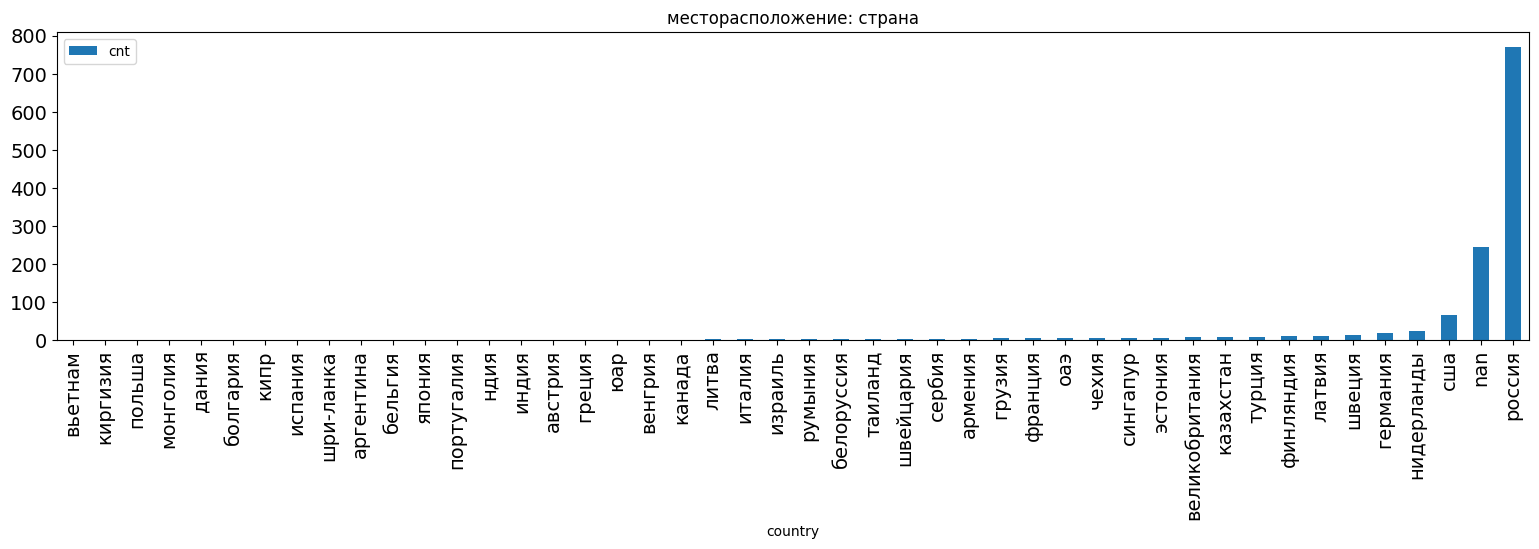

In [ ]:
m = list(df_clients['страны'].str.strip().str.replace('\n', ' ').str.lower().tolist())
cnt_country = dict()

for i in m:
  for j in str(i).split():
    if j in cnt_country:
      cnt_country[j] += 1
    else:
      cnt_country[j] = 1

df = pd.DataFrame(list(cnt_country. items ()), columns = ['country', 'cnt'])

df.sort_values(by='cnt', ascending=True).plot(
    x="country",
    y="cnt",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    title='месторасположение: страна'
)

Вывод: как видно лидеры по пожертованиям Россия и США

<Axes: title={'center': 'месторасположение: регионы'}, xlabel='region'>

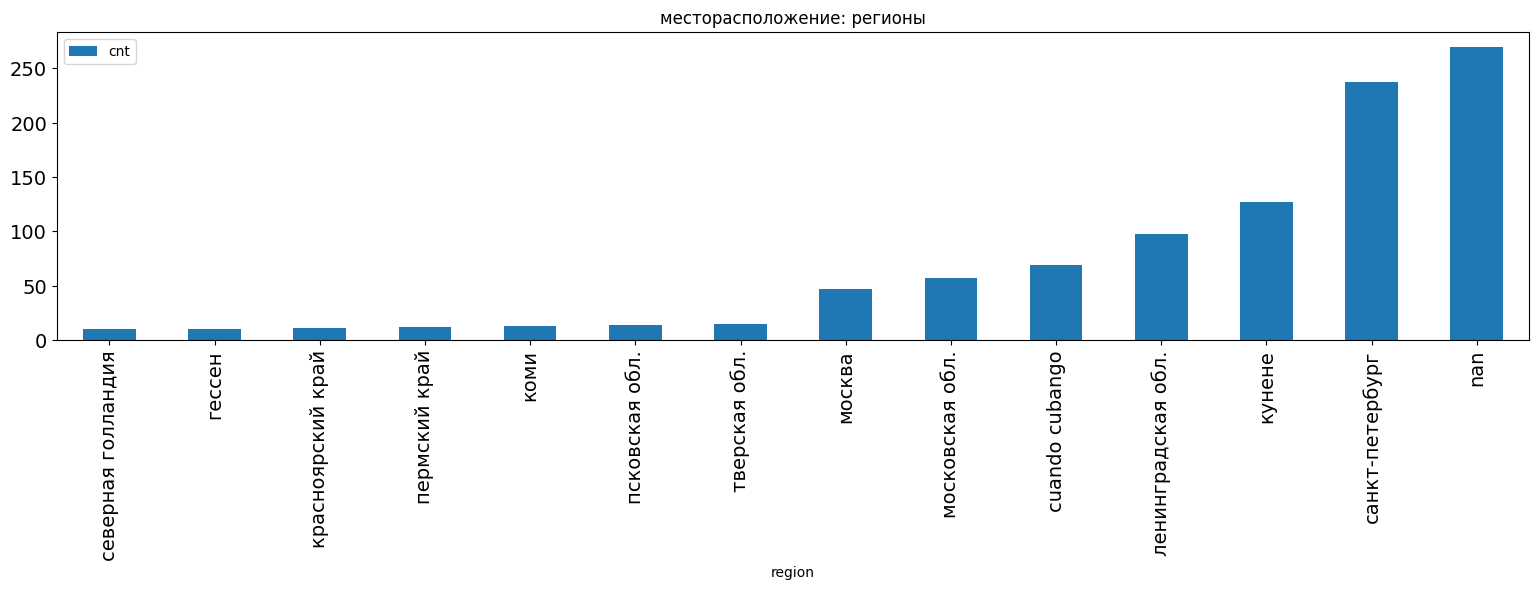

In [ ]:
m = list(df_clients['регионы'].str.strip().str.lower().tolist())
cnt_region = dict()

for i in m:
  for j in str(i).split('\n'):
    if j in cnt_region:
      cnt_region[j] += 1
    else:
      cnt_region[j] = 1

df = pd.DataFrame(list(cnt_region. items ()), columns = ['region', 'cnt'])

df[df['cnt'] > 9].sort_values(by='cnt', ascending=True).plot(
    x="region",
    y="cnt",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    title='месторасположение: регионы'
)

In [ ]:
df_clients[df_clients['регионы'] == 'Кунене'].head()

,id,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,всего_платежей,сумма_всего,сумма_за_месяц,страны,регионы,последний_платеж,код
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122
12,711311,2022-01-08 23:38:04,0,0,карта,1,500,1,500,0,Россия,Кунене,2022-01-08 23:38:04,1130
17,711547,2022-01-10 17:11:59,0,0,карта,1,500,1,500,0,Россия,Кунене,2022-01-10 17:11:59,1135
20,711802,2022-01-11 19:01:33,0,0,карта,1,500,1,500,0,Россия,Кунене,2022-01-14 16:10:10,1138
22,715132,2022-01-17 09:03:58,0,0,карта,1,300,1,300,0,Россия,Кунене,2022-01-17 09:03:58,1140


Вывод: лидеры по пожертованиям среди регионов СПб и Кунене(Россия)

### 2.1.2 способы оплаты

<Axes: title={'center': 'тип_оплаты'}, xlabel='type_pay'>

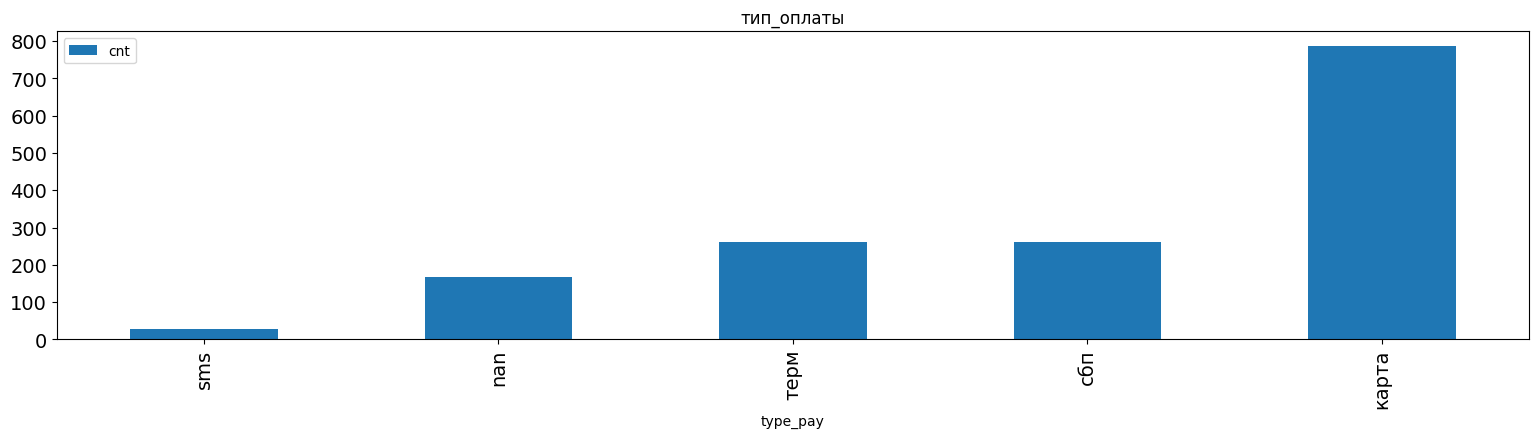

In [ ]:
m = list(df_clients['типы_оплаты'].str.strip().str.replace('\n', ' ').str.lower().tolist())
cnt_type_pay = dict()

for i in m:
  for j in str(i).split(','):
    if j in cnt_type_pay:
      cnt_type_pay[j] += 1
    else:
      cnt_type_pay[j] = 1

df = pd.DataFrame(list(cnt_type_pay. items ()), columns = ['type_pay', 'cnt'])

df.sort_values(by='cnt', ascending=True).plot(
    x="type_pay",
    y="cnt",
    kind="bar",
    rot=90,
    fontsize=14,
    figsize=(19,4),
    title='тип_оплаты'
)

Вывод: лидеры по способу оплаты - карта (с большим отрывом), спб и терминал

### 2.1.3 сумму платежа в месяц/год

In [ ]:
df_clients['сумма_за_месяц_cut'] = pd.qcut(df_clients['сумма_за_месяц'].rank(method='first'), q=4)

In [ ]:
df_clients.groupby(['сумма_за_месяц_cut'])['id'].count()

сумма_за_месяц_cut
(0.999, 292.25]     292
(292.25, 583.5]     291
(583.5, 874.75]     291
(874.75, 1166.0]    292
Name: id, dtype: int64

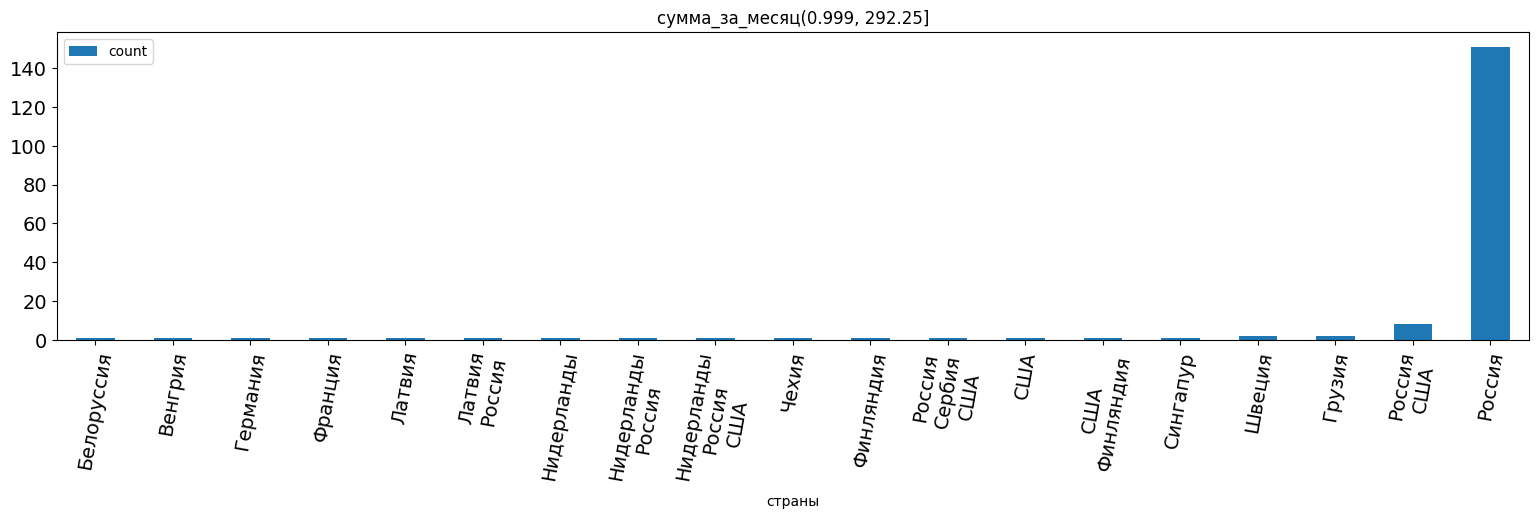

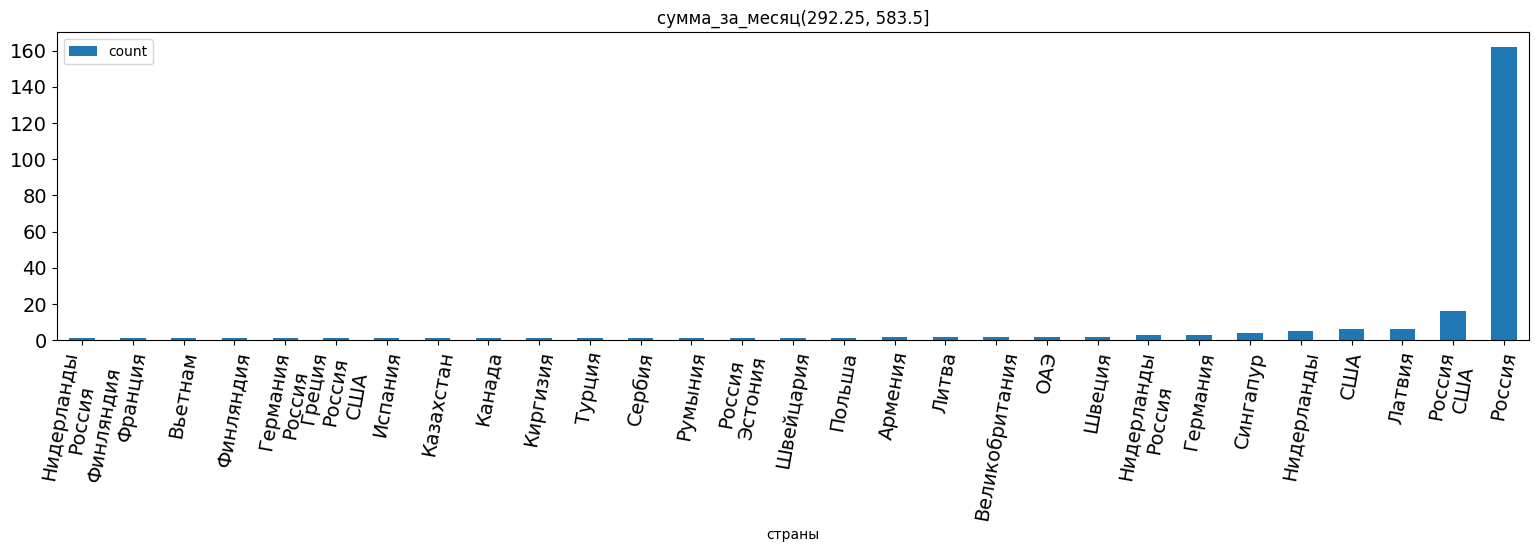

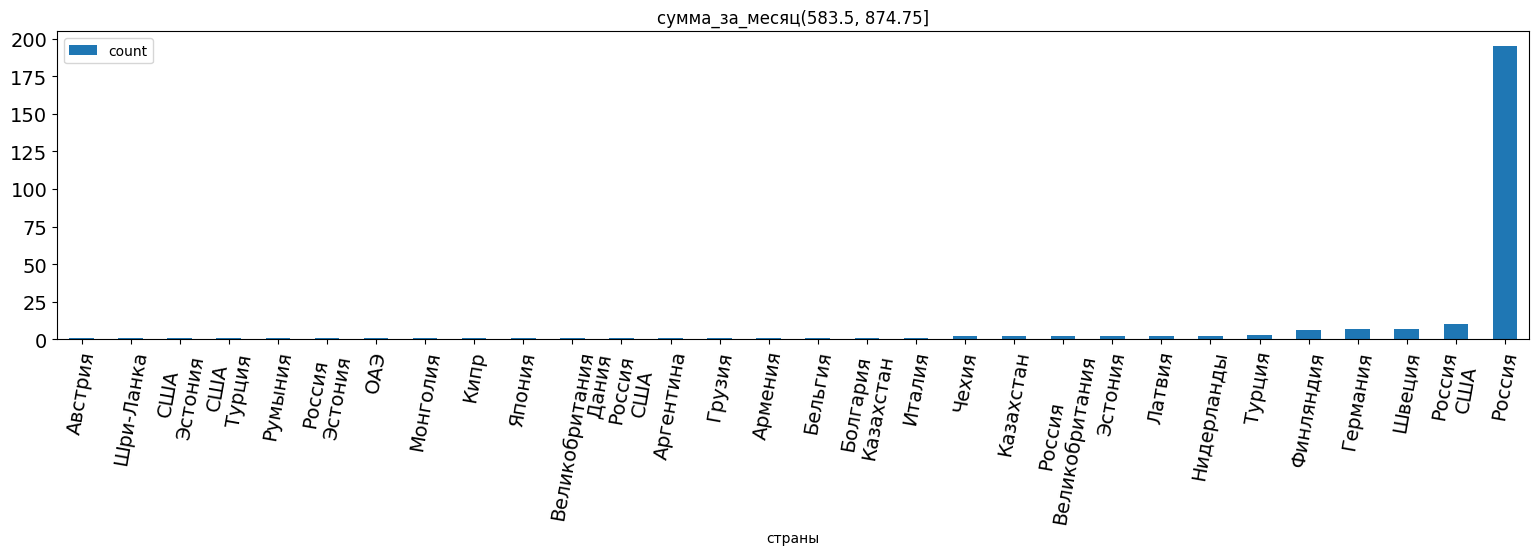

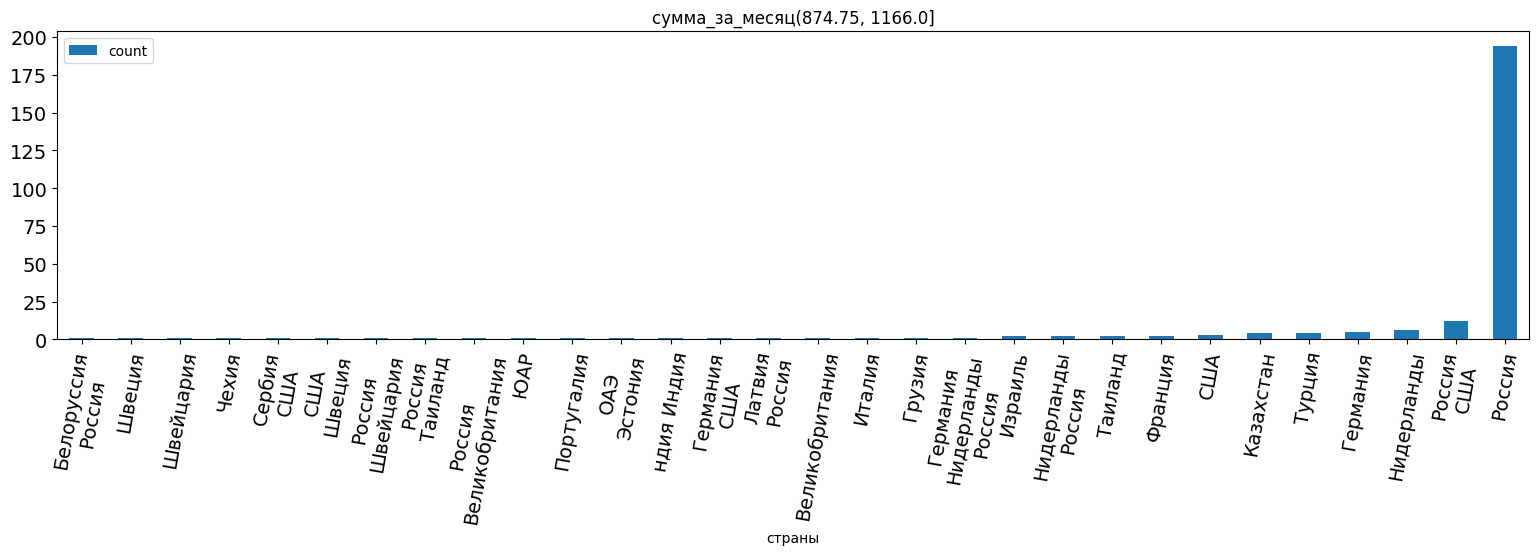

In [ ]:


for i in df_clients['сумма_за_месяц_cut'].unique():

  df_clients[df_clients['сумма_за_месяц_cut'] == i].groupby(['страны'])['id'].agg(['count']).reset_index().sort_values(by='count').plot(
          x="страны",
          y="count",
          kind="bar",
          rot=80,
          fontsize=14,
          figsize=(19,4),
          title='сумма_за_месяц' + str(i)
  )

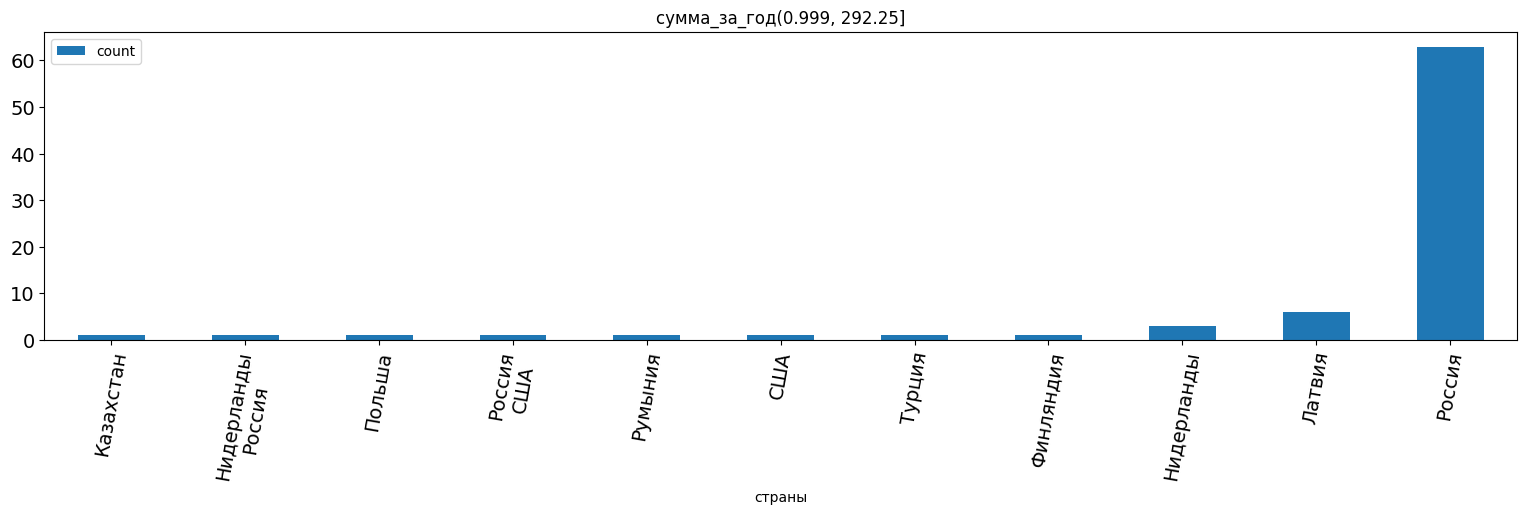

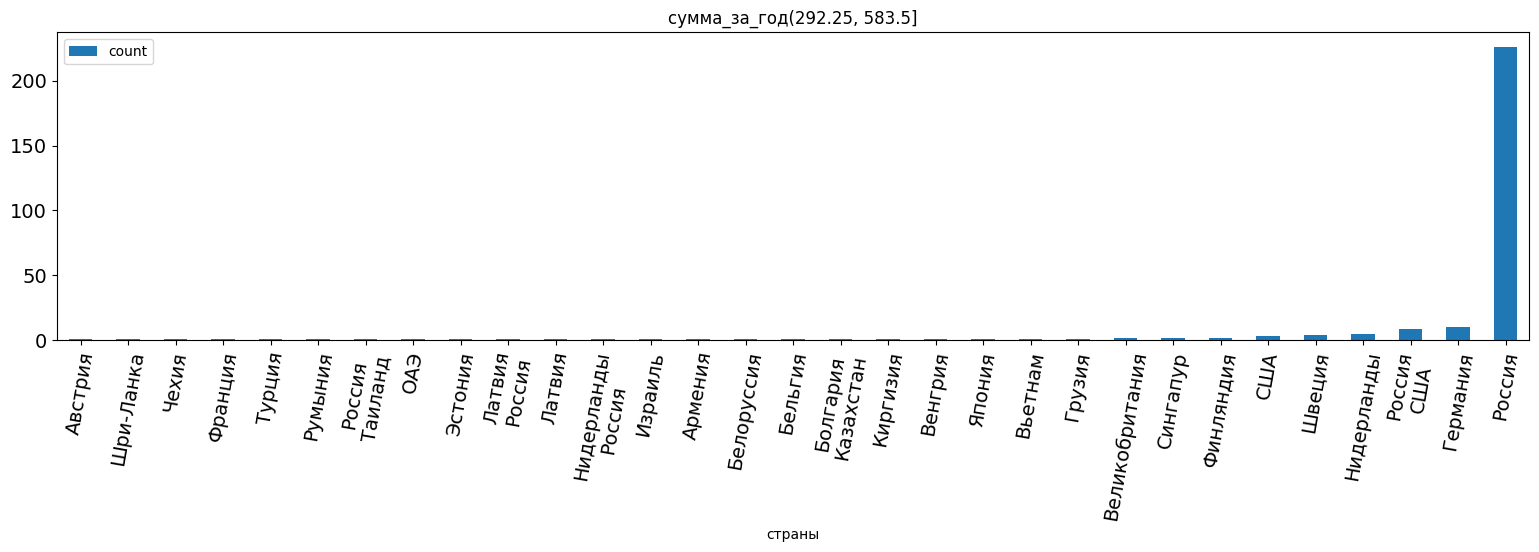

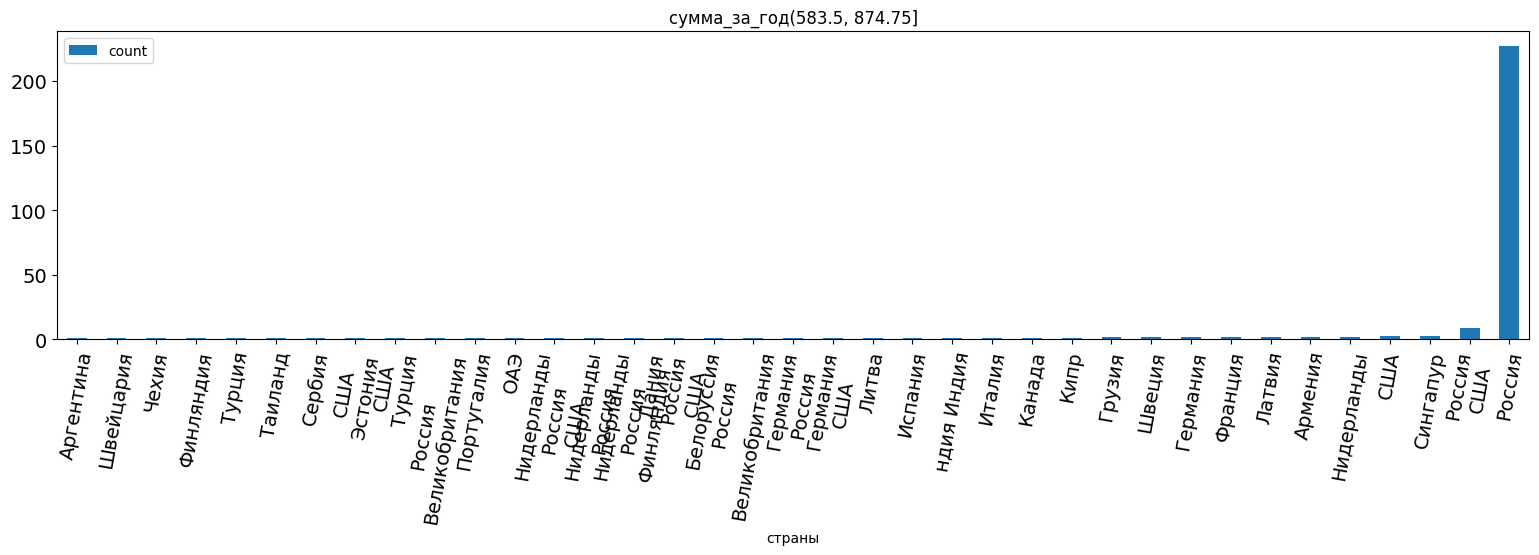

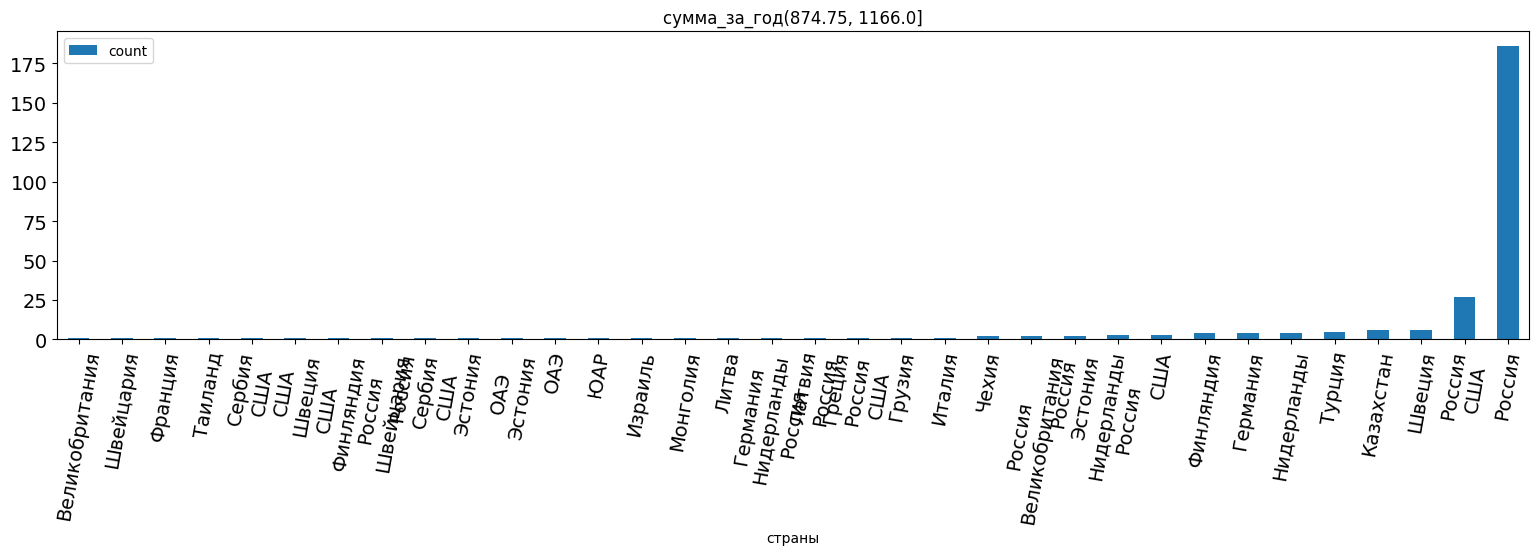

In [ ]:
df_clients['сумма_за_год_cut'] = pd.qcut(df_clients['сумма_за_год'].rank(method='first'), q=4)

for i in df_clients['сумма_за_год_cut'].unique():

  df_clients[df_clients['сумма_за_год_cut'] == i].groupby(['страны'])['id'].agg(['count']).reset_index().sort_values(by='count').plot(
          x="страны",
          y="count",
          kind="bar",
          rot=80,
          fontsize=14,
          figsize=(19,4),
          title='сумма_за_год' + str(i)
  )

Вывод: максимальные и минимальные суммы из России.

### 2.1.4 кол-во платежей

<Axes: title={'center': 'всего_платежей'}, xlabel='страны'>

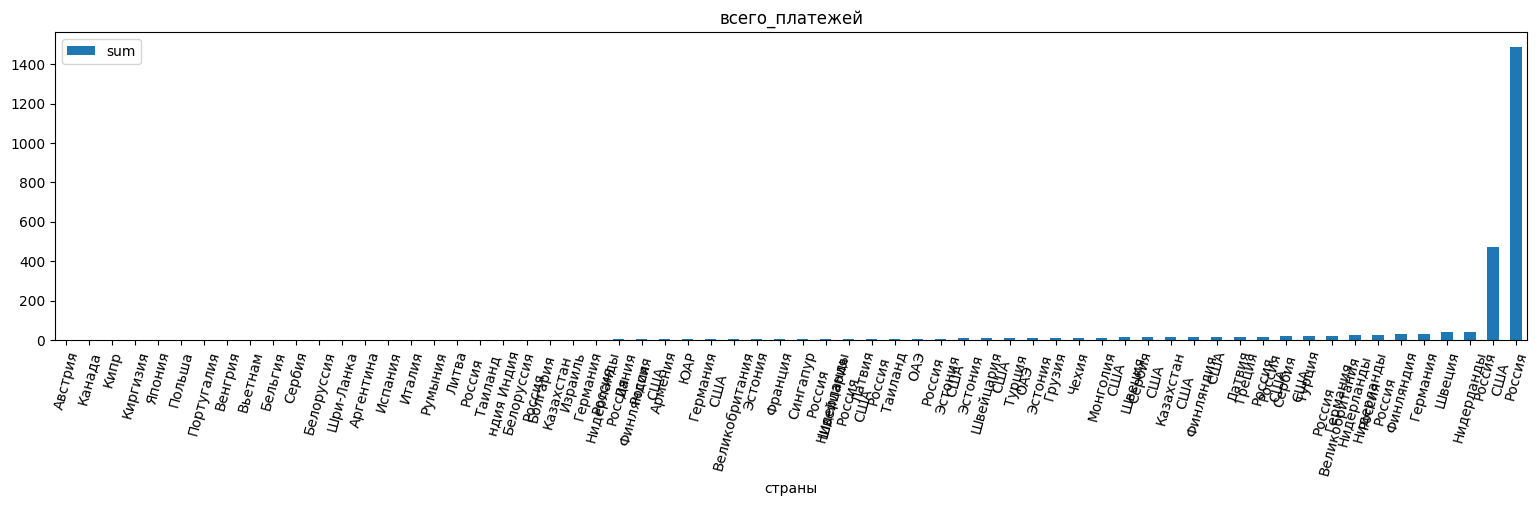

In [ ]:
df_clients.groupby(['страны'])['всего_платежей'].agg(['sum']).reset_index().sort_values(by='sum').plot(
          x="страны",
          y="sum",
          kind="bar",
          rot=75,
          fontsize=10,
          figsize=(19,4),
          title='всего_платежей'
  )

Вывод: наибольшее количество платежей из России.

<Axes: title={'center': 'всего_платежей'}, xlabel='регионы'>

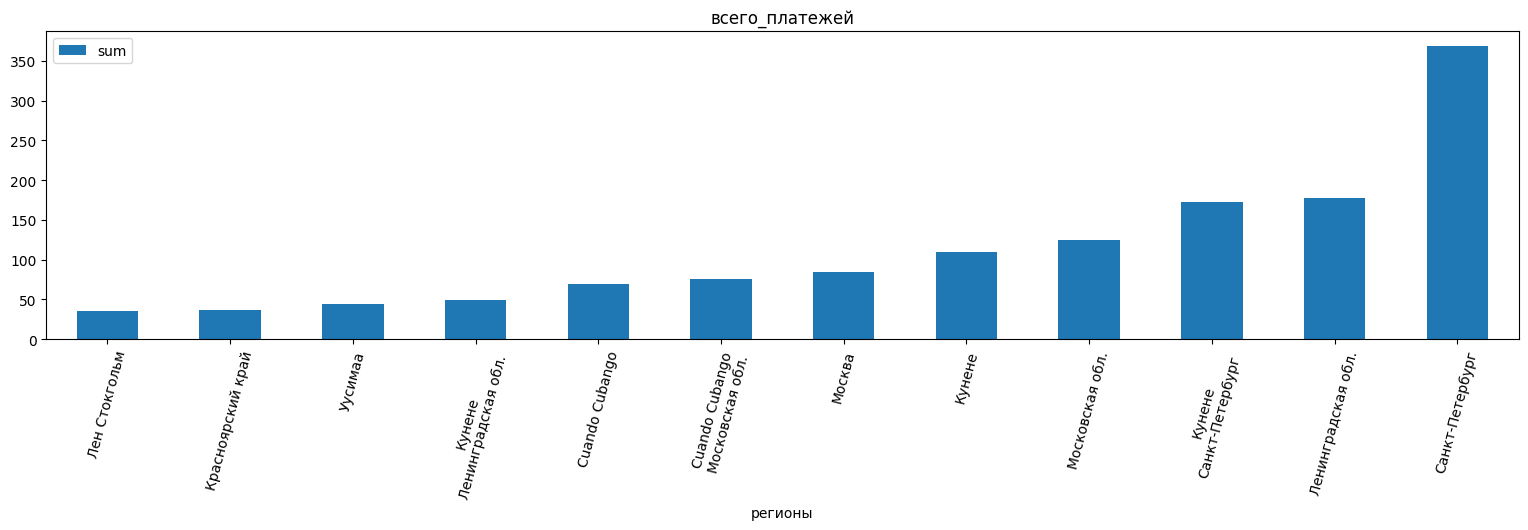

In [ ]:
df_clients_slice = df_clients.groupby(['регионы'])['всего_платежей'].agg(['sum']).reset_index().sort_values(by='sum')
df_clients_slice[df_clients_slice['sum'] > 30].plot(
          x="регионы",
          y="sum",
          kind="bar",
          rot=75,
          fontsize=10,
          figsize=(19,4),
          title='всего_платежей'
  )

вывод: больше всего платежей приходят из СПб и Ленинградской области. Стоит отметить так же Мск и Кунене

### 2.1.5 долю подписчиков

In [ ]:
f"доля подписок {df_clients['подписки_вкл'].sum() / len(df_clients)}"

'доля подписок 0.1998284734133791'

In [ ]:
f"доля подписок {df_clients['подписки_выкл'].sum() / len(df_clients)}"

'доля подписок 0.14922813036020582'

<Axes: title={'center': 'подписки_вкл'}, xlabel='страны'>

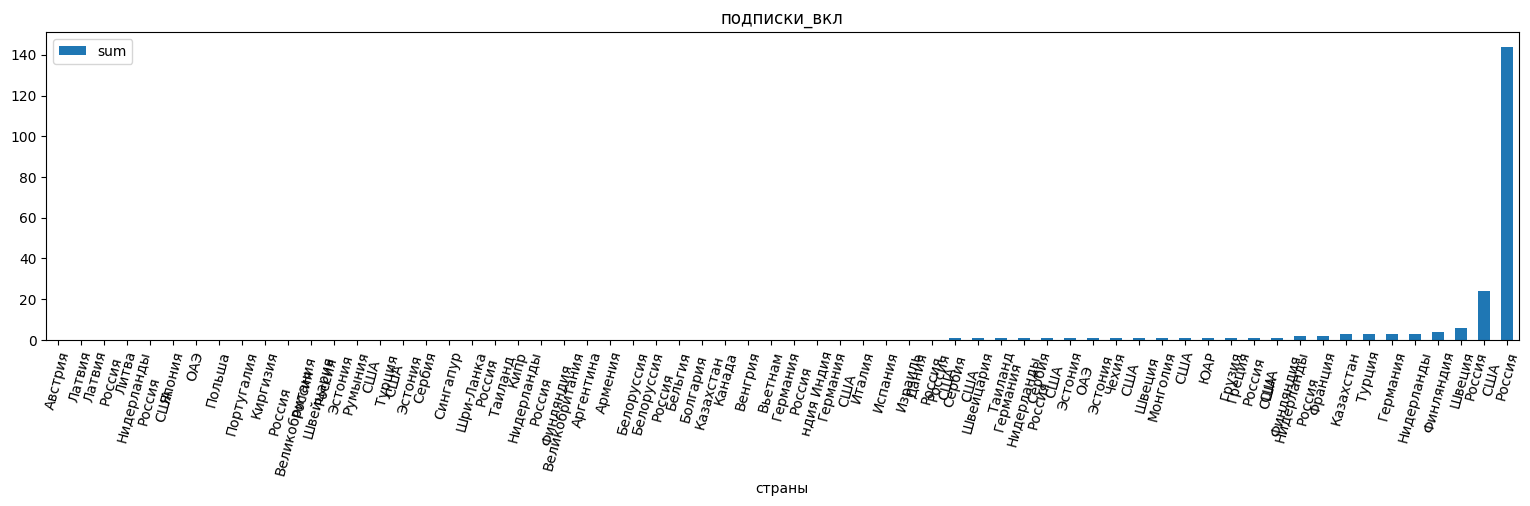

In [ ]:
df_clients.groupby(['страны'])['подписки_вкл'].agg(['sum']).reset_index().sort_values(by='sum').plot(
          x="страны",
          y="sum",
          kind="bar",
          rot=75,
          fontsize=10,
          figsize=(19,4),
          title='подписки_вкл'
  )

<Axes: title={'center': 'подписки_вкл'}, xlabel='регионы'>

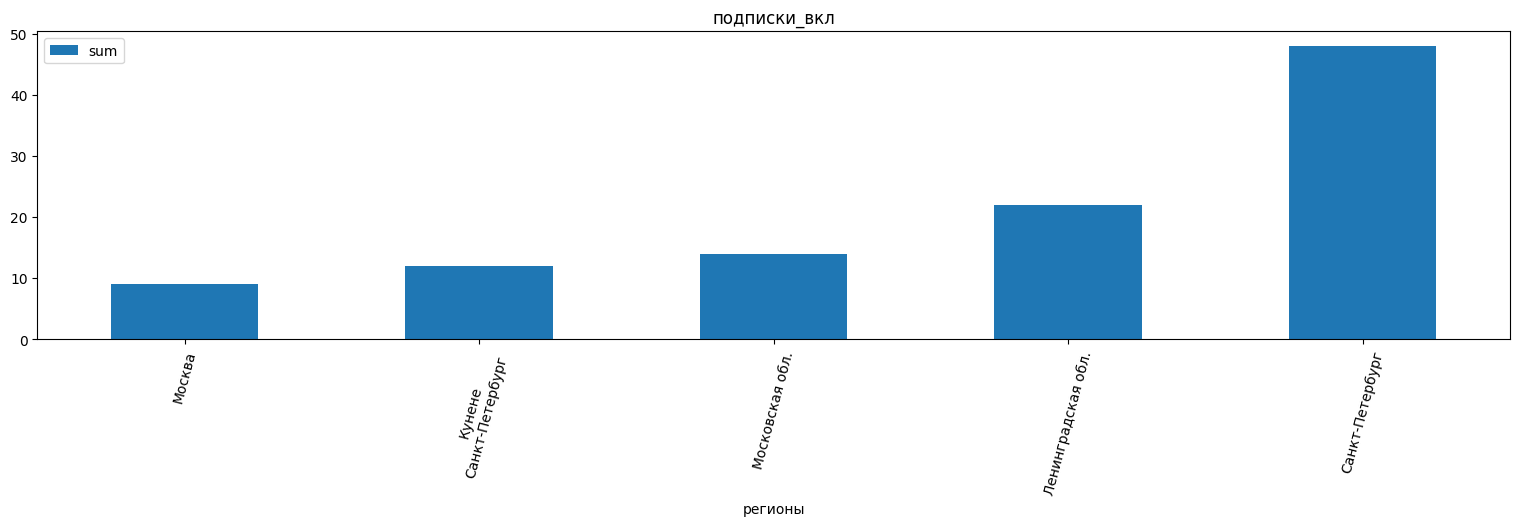

In [ ]:
df_clients_slice = df_clients.groupby(['регионы'])['подписки_вкл'].agg(['sum']).reset_index().sort_values(by='sum')
df_clients_slice[df_clients_slice['sum'] > 5].plot(
          x="регионы",
          y="sum",
          kind="bar",
          rot=75,
          fontsize=10,
          figsize=(19,4),
          title='подписки_вкл'
  )

Вывод:
- доля подписок мала, то стоит отметить что в данном столбце много пропусков
- в основном подписчики из России, Ленинградская область

In [ ]:
df_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1166 entries, 0 to 1165
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  1166 non-null   int64         
 1   первый_платеж       1166 non-null   datetime64[ns]
 2   подписки_вкл        1166 non-null   int64         
 3   подписки_выкл       1166 non-null   int64         
 4   типы_оплаты         998 non-null    object        
 5   платежей_за_год     1166 non-null   int64         
 6   сумма_за_год        1166 non-null   int64         
 7   всего_платежей      1166 non-null   int64         
 8   сумма_всего         1166 non-null   int64         
 9   сумма_за_месяц      1166 non-null   int64         
 10  страны              922 non-null    object        
 11  регионы             896 non-null    object        
 12  последний_платеж    1166 non-null   datetime64[ns]
 13  код                 1166 non-null   int64       

In [ ]:
df_clients.head()

,id,первый_платеж,подписки_вкл,подписки_выкл,типы_оплаты,платежей_за_год,сумма_за_год,всего_платежей,сумма_всего,сумма_за_месяц,страны,регионы,последний_платеж,код,сумма_за_месяц_cut,сумма_за_год_cut
0,707634,2021-12-28 16:54:52,0,0,карта,0,0,0,0,0,NaN,NaN,2021-12-28 16:54:52,1118,"(0.999, 292.25]","(0.999, 292.25]"
1,789437,2022-03-12 00:16:40,0,0,карта,0,0,0,0,0,NaN,NaN,2022-03-12 00:16:40,1119,"(0.999, 292.25]","(0.999, 292.25]"
2,1078426,2022-11-23 12:55:04,0,0,NaN,0,0,0,0,0,NaN,NaN,2022-11-23 12:55:04,1120,"(0.999, 292.25]","(0.999, 292.25]"
3,1078667,2022-11-23 16:28:46,0,0,NaN,1,500,1,500,0,Россия,Ленинградская обл.,2022-11-23 16:28:46,1121,"(0.999, 292.25]","(292.25, 583.5]"
4,708416,2021-12-29 17:04:26,0,0,карта,1,1000,1,1000,0,Россия,Кунене,2021-12-29 17:04:26,1122,"(0.999, 292.25]","(583.5, 874.75]"


## датасет df_donors

### 2.1.6 тип клиента

<Axes: title={'center': 'тип_донора'}, xlabel='тип_донора'>

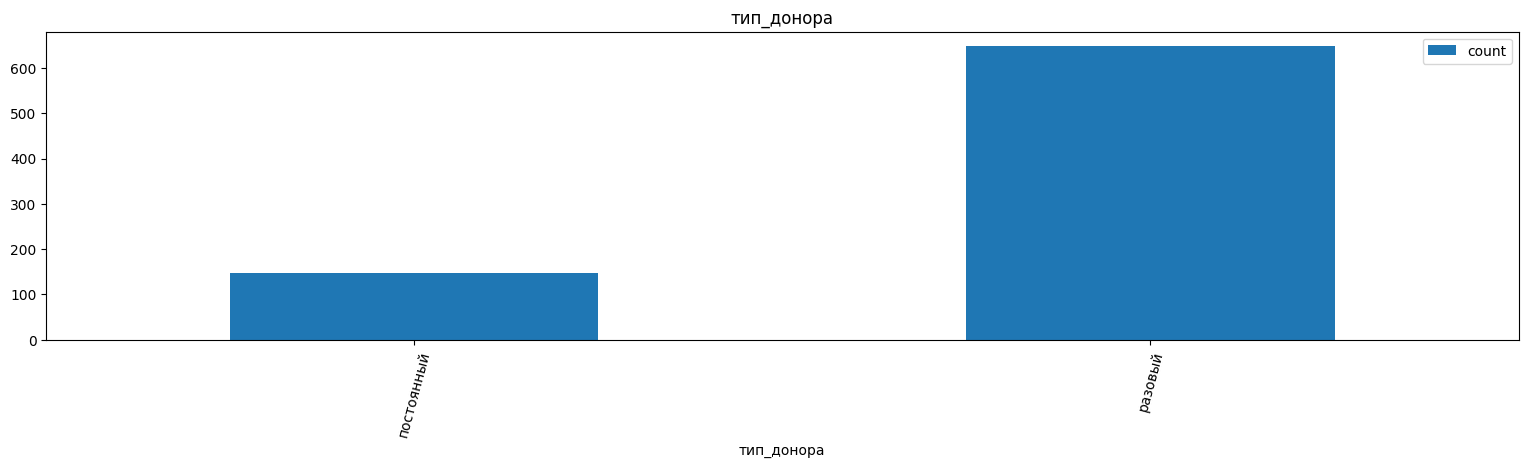

In [ ]:
df_donors.groupby(['тип_донора'])['id'].agg(['count']).reset_index().sort_values(by='count').plot(
          x="тип_донора",
          y="count",
          kind="bar",
          rot=75,
          fontsize=10,
          figsize=(19,4),
          title='тип_донора'
  )

In [ ]:
f"доля постоянных пожертователей: {len(df_donors[df_donors['тип_донора'] == 'постоянный']) / len(df_donors)}"

'доля постоянных пожертователей: 0.18490566037735848'

Вывод: доля постоянных жертователей составляет 18%

### 2.1.7 валюту пожертвования

In [ ]:
df_donors['валюта'].unique()

array(['₽'], dtype=object)

### 2.1.8 сумму первого пожертвования

In [ ]:
df_donors['сумма_первого_пожертвования_cut'] = pd.qcut(df_donors['сумма_первого_пожертвования'], q=4)
df_donors['сумма_первого_пожертвования_cut'].value_counts()

(9.999, 300.0]      384
(900.0, 50000.0]    193
(450.0, 900.0]      168
(300.0, 450.0]       50
Name: сумма_первого_пожертвования_cut, dtype: int64

In [ ]:
df_donors[df_donors['тип_донора'] == 'постоянный']['сумма_первого_пожертвования_cut'].value_counts()

(9.999, 300.0]      76
(450.0, 900.0]      35
(900.0, 50000.0]    35
(300.0, 450.0]       1
Name: сумма_первого_пожертвования_cut, dtype: int64

In [ ]:
df_donors[df_donors['тип_донора'] == 'разовый']['сумма_первого_пожертвования_cut'].value_counts()

(9.999, 300.0]      308
(900.0, 50000.0]    158
(450.0, 900.0]      133
(300.0, 450.0]       49
Name: сумма_первого_пожертвования_cut, dtype: int64

Вывод:
- самая поппулярная  сумму первых пожертований - до 300р
- все пожертования в рублях
- на втором месте пожертования суммой от 900 до 50000р, стоит отметить, что при разделении на тип_донора, у разовых так же эта сумма на втором месте, а у постоянных лишь на третьем
- саммая не популярная сумма пожертований от 300 до 450 рублей

### 2.1.9 сумму последнего пожертвования

In [ ]:
df_donors['сумма_последнего_пожертвования_cut'] = pd.qcut(df_donors['сумма_последнего_пожертвования'], q=4)
df_donors['сумма_последнего_пожертвования_cut'].value_counts()

(9.999, 300.0]      379
(900.0, 50000.0]    196
(450.0, 900.0]      171
(300.0, 450.0]       49
Name: сумма_последнего_пожертвования_cut, dtype: int64

In [ ]:
df_donors[df_donors['тип_донора'] == 'постоянный']['сумма_последнего_пожертвования_cut'].value_counts()

(9.999, 300.0]      74
(900.0, 50000.0]    38
(450.0, 900.0]      34
(300.0, 450.0]       1
Name: сумма_последнего_пожертвования_cut, dtype: int64

In [ ]:
df_donors[df_donors['тип_донора'] == 'разовый']['сумма_последнего_пожертвования_cut'].value_counts()

(9.999, 300.0]      305
(900.0, 50000.0]    158
(450.0, 900.0]      137
(300.0, 450.0]       48
Name: сумма_последнего_пожертвования_cut, dtype: int64

вывод:
- самая популярная сумма последнего пожертования так же составляет до 300р
- на втором месте во всех двух группах сумма пожертований составляет от 900 до 50000р
- самая не популярная последняя сумма пожертований составляет от 300 до 450р

### 2.1.0  общую сумму пожертвования

In [ ]:
df_donors['общая_сумма_пожертвований_cut'] = pd.qcut(df_donors['общая_сумма_пожертвований'], q=4)
df_donors['общая_сумма_пожертвований_cut'].value_counts()

(9.999, 300.0]       236
(1200.0, 55000.0]    197
(600.0, 1200.0]      187
(300.0, 600.0]       175
Name: общая_сумма_пожертвований_cut, dtype: int64

In [ ]:
df_donors[df_donors['тип_донора'] == 'постоянный']['общая_сумма_пожертвований_cut'].value_counts()

(1200.0, 55000.0]    56
(9.999, 300.0]       37
(300.0, 600.0]       33
(600.0, 1200.0]      21
Name: общая_сумма_пожертвований_cut, dtype: int64

In [ ]:
df_donors[df_donors['тип_донора'] == 'разовый']['общая_сумма_пожертвований_cut'].value_counts()

(9.999, 300.0]       199
(600.0, 1200.0]      166
(300.0, 600.0]       142
(1200.0, 55000.0]    141
Name: общая_сумма_пожертвований_cut, dtype: int64

вывод:
- самая популярная общая сумма пожертований до 300р в общем для всех групп
- самая популярная общая сумма пожертований для постоянных жертователей составляет от 1200 до 55000р
- самая не популярная сумма для всех групп от 300 до 600р, от 600 до 1200 для постоянных и от 1200 до 55000р для разовых

## Общие выводы по части:
* Клиенты
	датасет df_clients
    - лидеры по пожертвованиям Россия и США
    - лидеры по пожертвованиям среди регионов СПб и Кунене(Россия)
    - лидеры по способу оплаты - карта (с большим отрывом), спб и терминал
    - максимальные и минимальные суммы из России.
    - наибольшее количество платежей из России.
    - больше всего платежей приходят из СПб и Ленинградской области. Стоит отметить так же Мск и Кунене
    - доля подписок мала, то стоит отметить что в данном столбце много пропусков
    - в основном подписчики из России, Ленинградская область
	датасет df_donors
    - доля постоянных жертвователей составляет 18%
    - самая популярная сумму первых пожертвований - до 300р
    - все пожертвования в рублях
    - на втором месте пожертвования суммой от 900 до 50000р, стоит отметить, что при разделении на тип_донора, у разовых так же эта сумма на втором месте, а у постоянных лишь на третьем
    - самая не популярная сумма пожертвований от 300 до 450 рублей
    - самая популярная сумма последнего пожертования так же составляет до 300р
    - на втором месте во всех двух группах сумма пожертований составляет от 900 до 50000р
    - самая не популярная последняя сумма пожертований составляет от 300 до 450р
    - самая популярная общая сумма пожертований до 300р в общем для всех групп
    - самая популярная общая сумма пожертований для постоянных жертователей составляет от 1200 до 55000р
    - самая не популярная сумма для всех групп от 300 до 600р, от 600 до 1200 для постоянных и от 1200 до 55000р для разовых

## 2.2 Конверсия

2.2.1 Конверсия в кол-во платежей

In [ ]:
print('Все жертователи')
cv = dict()
for i in range(1, df_clients['всего_платежей'].max() + 1):
  cv[i] = round(len(df_clients[(df_clients['всего_платежей'] >= i)]) / len(df_clients), 2)
  print('-' * (df_clients['всего_платежей'].max() - i))
  print(f"CV({i} платежей): {round(len(df_clients[(df_clients['всего_платежей'] >= i)]) / len(df_clients), 2)}")
  print(f"кол-во стран {len(df_clients[(df_clients['всего_платежей'] >= i)]['страны'].unique())}")
  print(f"страны: {df_clients[(df_clients['всего_платежей'] >= i)]['страны'].unique() if len(df_clients[(df_clients['всего_платежей'] >= i)]['страны'].unique()) < 6 else 'мн-во'}")
  print(f"кол-во платежных систем {len(df_clients[(df_clients['всего_платежей'] >= i)]['типы_оплаты'].unique())}")
  print(f"платежные системы {df_clients[(df_clients['всего_платежей'] >= i)]['типы_оплаты'].unique()}")
  print()

Все жертователи
-----------------------
CV(1 платежей): 0.82
кол-во стран 65
страны: мн-во
кол-во платежных систем 8
платежные системы [nan 'карта' 'sms,карта' 'терм,СБП' 'карта,терм,СБП' 'sms'
 'sms,карта,терм,СБП' 'sms,терм,СБП']

----------------------
CV(2 платежей): 0.33
кол-во стран 43
страны: мн-во
кол-во платежных систем 6
платежные системы ['карта' 'карта,терм,СБП' 'терм,СБП' 'sms,карта' 'sms,карта,терм,СБП'
 'sms,терм,СБП']

---------------------
CV(3 платежей): 0.24
кол-во стран 37
страны: мн-во
кол-во платежных систем 6
платежные системы ['карта' 'sms,карта' 'карта,терм,СБП' 'терм,СБП' 'sms,карта,терм,СБП'
 'sms,терм,СБП']

--------------------
CV(4 платежей): 0.18
кол-во стран 35
страны: мн-во
кол-во платежных систем 4
платежные системы ['карта' 'sms,карта' 'карта,терм,СБП' 'терм,СБП']

-------------------
CV(5 платежей): 0.15
кол-во стран 28
страны: мн-во
кол-во платежных систем 4
платежные системы ['карта' 'sms,карта' 'карта,терм,СБП' 'терм,СБП']

------------------
CV(6

<Axes: >

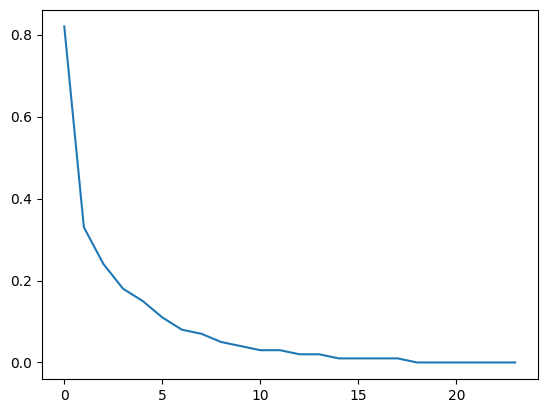

In [ ]:
df_cv = pd.DataFrame.from_dict(cv, orient='index').reset_index()
df_cv.columns = ['count_pay', 'cv']

df_cv['cv'].plot()

Вывод:
- после 15 платежей клиенты все теряются
- после 10 платежей пропадают почти все уже жертователи
- минимальное кол-во платежей которые совершают пользователи - 6 раз
- максимальное кол-во платежей жертователя - 23 раза
- смс оплата до 14 раз
- карта, терминал и спб чаще всего используются во время всех платежей
- самая большая периодичность платежей у пользователей из Германии, России, Нидерланды

## Вывод по части:
    * после 15 платежей клиенты все теряются
    * после 10 платежей пропадают почти все уже жертователи
    * минимальное кол-во платежей которые совершают пользователи - 6 раз
    * максимальное кол-во платежей жертователя - 23 раза
    * смс оплата до 14 раз
    * карта, терминал и спб чаще всего используются во время всех платежей
    * самая большая периодичность платежей у пользователей из Германии, России, Нидерланды

## 2.2 Анализ рекламных кампаний

- удержание пользователей пришедших после кампаний
- посчитать метрики

### 2.2.1 удержание пользователей пришедших после кампаний

In [ ]:
df_donors_full = df_donors.merge(df_clients, how = 'left', left_on='код', right_on='код')
df_donors_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 0 to 794
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   id_x                                795 non-null    int64         
 1   тип_донора                          795 non-null    object        
 2   дата_первого_пожертвования          795 non-null    datetime64[ns]
 3   сумма_первого_пожертвования         795 non-null    float64       
 4   кампания_первого_пожертвования      795 non-null    object        
 5   кампании                            795 non-null    object        
 6   платёжные_операторы                 795 non-null    object        
 7   дата_последнего_пожертвования       795 non-null    datetime64[ns]
 8   сумма_последнего_пожертвования      795 non-null    float64       
 9   кампания_последнего_пожертвования   795 non-null    object        
 10  общая_сумма_пожертвований 

In [ ]:
df_donors_full['кампании'].unique()

array(['На уставную деятельность и содержание организации',
       '#Больничкабежит',
       '#Больничкабежит, На уставную деятельность и содержание организации'],
      dtype=object)

In [ ]:
df_donors_full['кампании'].value_counts()

На уставную деятельность и содержание организации                     791
#Больничкабежит                                                         3
#Больничкабежит, На уставную деятельность и содержание организации      1
Name: кампании, dtype: int64

In [ ]:
print('Все жертователи')
df_donors_full = df_donors_full[~df_donors_full['id_y'].isnull()]
for i in range(1, int(df_donors_full['всего_платежей'].max()) + 1):
  print('-' * int(df_donors_full['всего_платежей'].max() - i))
  print(f"CV({i} платежей): {round(len(df_donors_full[(df_donors_full['всего_платежей'] >= i)]) / len(df_donors_full), 2)}")
  print(f"кампании: {df_donors_full[(df_donors_full['всего_платежей'] >= i)]['кампании'].unique()}")
  print(f"кампания_первого_пожертвования: {df_donors_full[(df_donors_full['всего_платежей'] >= i)]['кампания_первого_пожертвования'].unique()}")
  print(f"кампания_последнего_пожертвования: {df_donors_full[(df_donors_full['всего_платежей'] >= i)]['кампания_последнего_пожертвования'].unique()}")
  print()
  print(f"кол-во стран {len(df_donors_full[(df_donors_full['всего_платежей'] >= i)]['страны'].unique())}")
  print(f"страны: {df_donors_full[(df_donors_full['всего_платежей'] >= i)]['страны'].unique() if len(df_donors_full[(df_donors_full['всего_платежей'] >= i)]['страны'].unique()) < 6 else 'мн-во'}")
  print(f"кол-во платежных систем {len(df_donors_full[(df_donors_full['всего_платежей'] >= i)]['типы_оплаты'].unique())}")
  print(f"платежные системы {df_donors_full[(df_donors_full['всего_платежей'] >= i)]['типы_оплаты'].unique()}")
  print()

Все жертователи
---------------------
CV(1 платежей): 1.0
кампании: ['На уставную деятельность и содержание организации' '#Больничкабежит']
кампания_первого_пожертвования: ['На уставную деятельность и содержание организации' '#Больничкабежит']
кампания_последнего_пожертвования: ['На уставную деятельность и содержание организации' '#Больничкабежит']

кол-во стран 44
страны: мн-во
кол-во платежных систем 5
платежные системы ['карта' 'карта,терм,СБП' 'терм,СБП' 'sms,карта' nan]

--------------------
CV(2 платежей): 0.24
кампании: ['На уставную деятельность и содержание организации']
кампания_первого_пожертвования: ['На уставную деятельность и содержание организации']
кампания_последнего_пожертвования: ['На уставную деятельность и содержание организации']

кол-во стран 20
страны: мн-во
кол-во платежных систем 3
платежные системы ['карта,терм,СБП' 'терм,СБП' 'карта']

-------------------
CV(3 платежей): 0.18
кампании: ['На уставную деятельность и содержание организации']
кампания_первого_по

Вывод:
- нужно учитывать что при объединении пропаает свыше 30%
- постоянные платежи идут от кампании 'На уставную деятельность и содержание организации'
- кампания '#Больничкабежит' приносит клиентов только с одним платежом, повторно клиенты платят
- нужно учитывать что кампания '#Больничкабежит' привела только 2-х клиентов

### 2.2.2 Динамика показов/кликов

In [ ]:
df_show = df_ad_ch_hospital_2.groupby(['дата', 'кампания'])['показы'].agg('sum').reset_index().sort_values(by='дата')
df_show

,дата,кампания,показы
0,2023-01-02,Команда#2 / Бот / СПб,75513
1,2023-01-05,Больничка_бизнес_ключи-интересы,10518
2,2023-01-05,Пакет_Бездомашний очаг_Верующие_ключи-интересы,5927
3,2023-01-05,Пакет_Бездомашний очаг_Психологическая помощь_...,1829
4,2023-01-05,Пакет_Бездомашний очаг_Реабилитационные центры...,2200
...,...,...,...
707,2023-12-07,РК_Общий сбор_средств,2905
704,2023-12-07,РК_Мобильная клиника,9676
705,2023-12-07,РК_Обустройство_клиники,2427
706,2023-12-07,РК_Обустройство_клиники_путешествия,4380


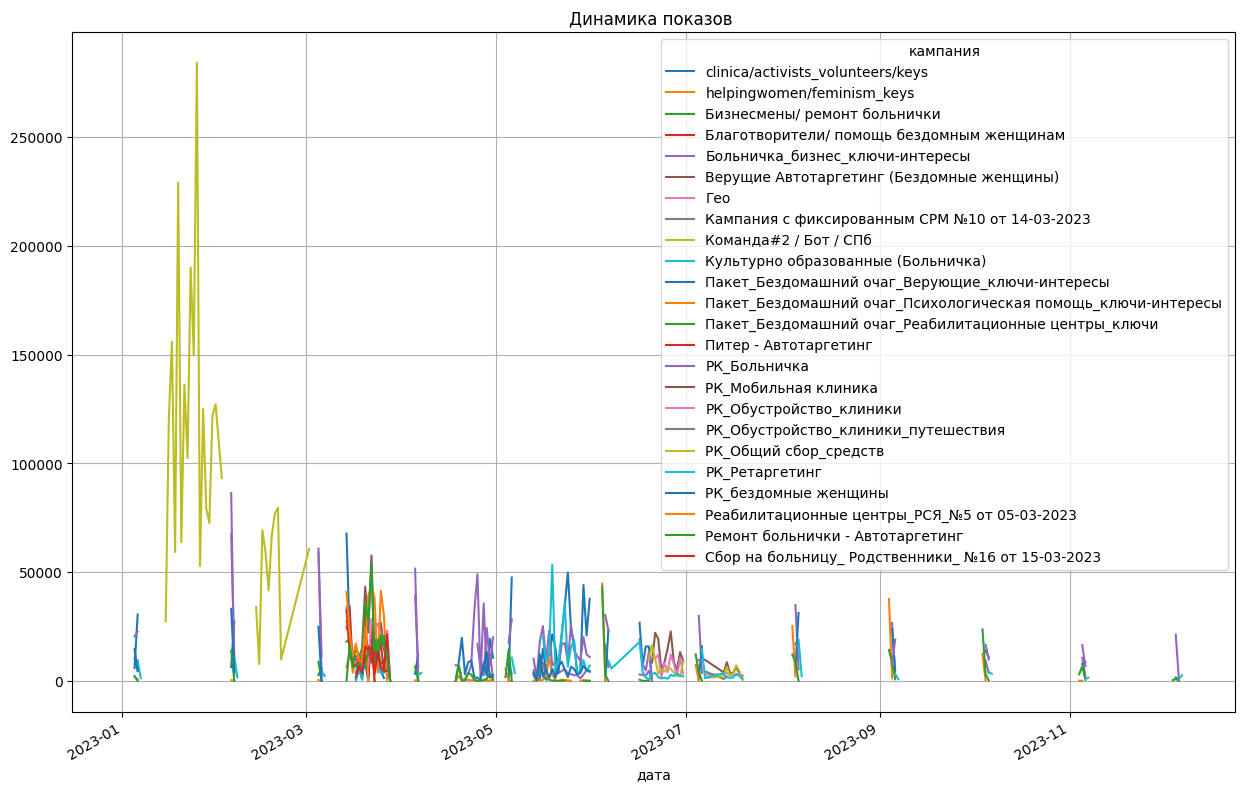

In [ ]:
pd.pivot_table(
    df_ad_ch_hospital_2, index='кампания', columns='дата', values='показы', aggfunc='sum'
    ).T.plot(figsize=(15, 10), grid=True, title='Динамика показов ')
plt.show()

In [ ]:
df_click = df_ad_ch_hospital_2.groupby(['дата', 'кампания'])['клики'].agg('sum').reset_index().sort_values(by='дата')
df_click

,дата,кампания,клики
0,2023-01-02,Команда#2 / Бот / СПб,448
1,2023-01-05,Больничка_бизнес_ключи-интересы,32
2,2023-01-05,Пакет_Бездомашний очаг_Верующие_ключи-интересы,16
3,2023-01-05,Пакет_Бездомашний очаг_Психологическая помощь_...,5
4,2023-01-05,Пакет_Бездомашний очаг_Реабилитационные центры...,18
...,...,...,...
707,2023-12-07,РК_Общий сбор_средств,22
704,2023-12-07,РК_Мобильная клиника,53
705,2023-12-07,РК_Обустройство_клиники,16
706,2023-12-07,РК_Обустройство_клиники_путешествия,19


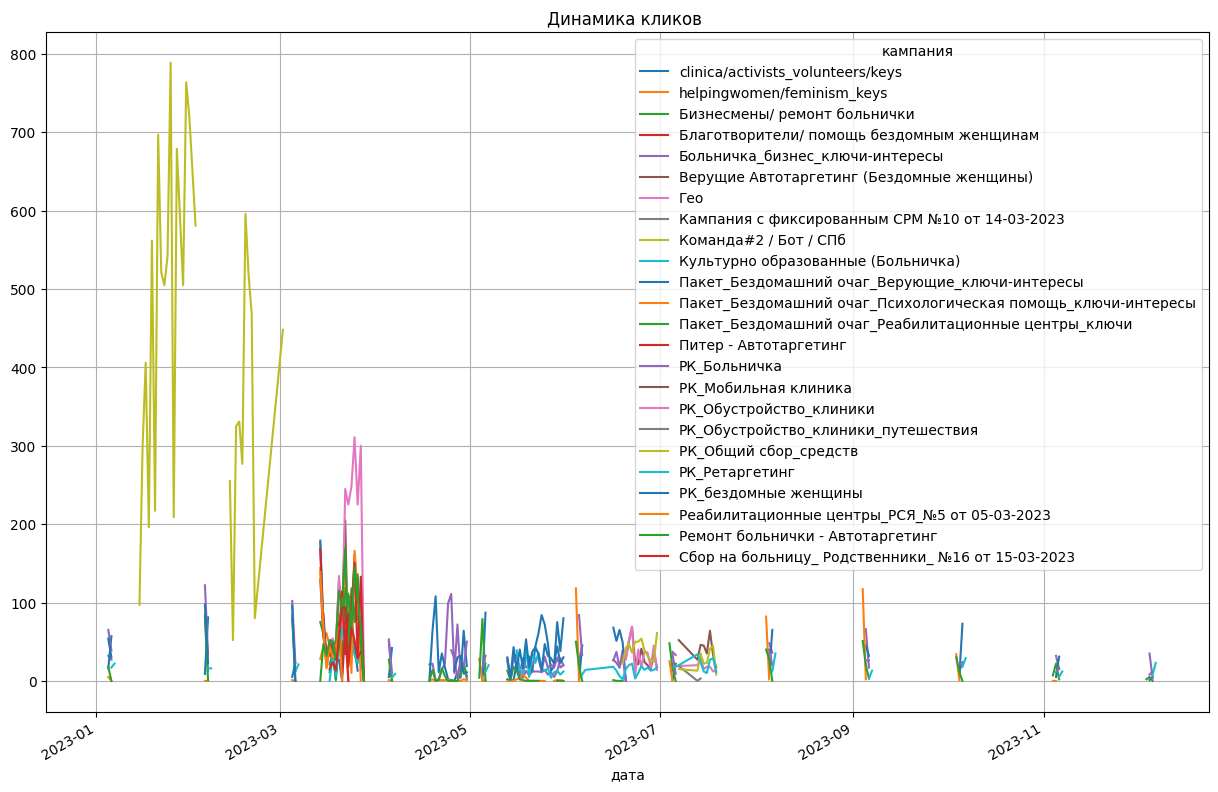

In [ ]:
pd.pivot_table(
    df_ad_ch_hospital_2, index='кампания', columns='дата', values='клики', aggfunc='sum'
    ).T.plot(figsize=(15, 10), grid=True, title='Динамика кликов ')
plt.show()

Вывод:
- самые большие кампании проходили в январе
- к концу года объем проводимых кампаний уменьшается
- "Команда#2 / Бот / СПб", самая большая по объему кампания

### 2.2.3 Клики

In [ ]:
df_click.head()

,дата,кампания,клики
0,2023-01-02,Команда#2 / Бот / СПб,448
1,2023-01-05,Больничка_бизнес_ключи-интересы,32
2,2023-01-05,Пакет_Бездомашний очаг_Верующие_ключи-интересы,16
3,2023-01-05,Пакет_Бездомашний очаг_Психологическая помощь_...,5
4,2023-01-05,Пакет_Бездомашний очаг_Реабилитационные центры...,18


Вывод: кампания "Команда#2 / Бот / СПб" больше всего приносит кликов с большим отрывом от других


### 2.2.4 Показы

In [ ]:
df_show.head()

,дата,кампания,показы
0,2023-01-02,Команда#2 / Бот / СПб,75513
1,2023-01-05,Больничка_бизнес_ключи-интересы,10518
2,2023-01-05,Пакет_Бездомашний очаг_Верующие_ключи-интересы,5927
3,2023-01-05,Пакет_Бездомашний очаг_Психологическая помощь_...,1829
4,2023-01-05,Пакет_Бездомашний очаг_Реабилитационные центры...,2200


Вывод: у кампании "Команда#2 / Бот / СПб" так же больше всего показов. Стоит отметить что у остальных компаний заметно меньше показов, а следовательно меньше всего аудитории их видит

### 2.2.5 Кликабельность. (CTR, WCTR)

In [ ]:
df_ctr = pd.merge(df_show, df_click,  how='left', left_on=['дата','кампания'], right_on = ['дата','кампания'])
df_show_w = df_ad_ch_hospital_2.groupby(['дата', 'кампания'])['взвешенные_показы'].agg('sum').reset_index().sort_values(by='дата')
df_ctr = pd.merge(df_ctr, df_show_w,  how='left', left_on=['дата','кампания'], right_on = ['дата','кампания'])
df_ctr

,дата,кампания,показы,клики,взвешенные_показы
0,2023-01-02,Команда#2 / Бот / СПб,75513,448,75513.0
1,2023-01-05,Больничка_бизнес_ключи-интересы,10518,32,10518.0
2,2023-01-05,Пакет_Бездомашний очаг_Верующие_ключи-интересы,5927,16,5927.0
3,2023-01-05,Пакет_Бездомашний очаг_Психологическая помощь_...,1829,5,1829.0
4,2023-01-05,Пакет_Бездомашний очаг_Реабилитационные центры...,2200,18,2200.0
...,...,...,...,...,...
704,2023-12-07,РК_Общий сбор_средств,2905,22,2905.0
705,2023-12-07,РК_Мобильная клиника,9676,53,9676.0
706,2023-12-07,РК_Обустройство_клиники,2427,16,2427.0
707,2023-12-07,РК_Обустройство_клиники_путешествия,4380,19,4380.0


In [ ]:
df_ctr['ctr'] = df_ctr['клики'] / df_ctr['показы']
df_ctr['wctr'] = df_ctr['ctr'] / df_ctr['взвешенные_показы']
df_ctr

,дата,кампания,показы,клики,взвешенные_показы,ctr,wctr
0,2023-01-02,Команда#2 / Бот / СПб,75513,448,75513.0,0.005933,7.856599e-08
1,2023-01-05,Больничка_бизнес_ключи-интересы,10518,32,10518.0,0.003042,2.892568e-07
2,2023-01-05,Пакет_Бездомашний очаг_Верующие_ключи-интересы,5927,16,5927.0,0.002700,4.554599e-07
3,2023-01-05,Пакет_Бездомашний очаг_Психологическая помощь_...,1829,5,1829.0,0.002734,1.494661e-06
4,2023-01-05,Пакет_Бездомашний очаг_Реабилитационные центры...,2200,18,2200.0,0.008182,3.719008e-06
...,...,...,...,...,...,...,...
704,2023-12-07,РК_Общий сбор_средств,2905,22,2905.0,0.007573,2.606936e-06
705,2023-12-07,РК_Мобильная клиника,9676,53,9676.0,0.005477,5.660883e-07
706,2023-12-07,РК_Обустройство_клиники,2427,16,2427.0,0.006593,2.716317e-06
707,2023-12-07,РК_Обустройство_клиники_путешествия,4380,19,4380.0,0.004338,9.903880e-07


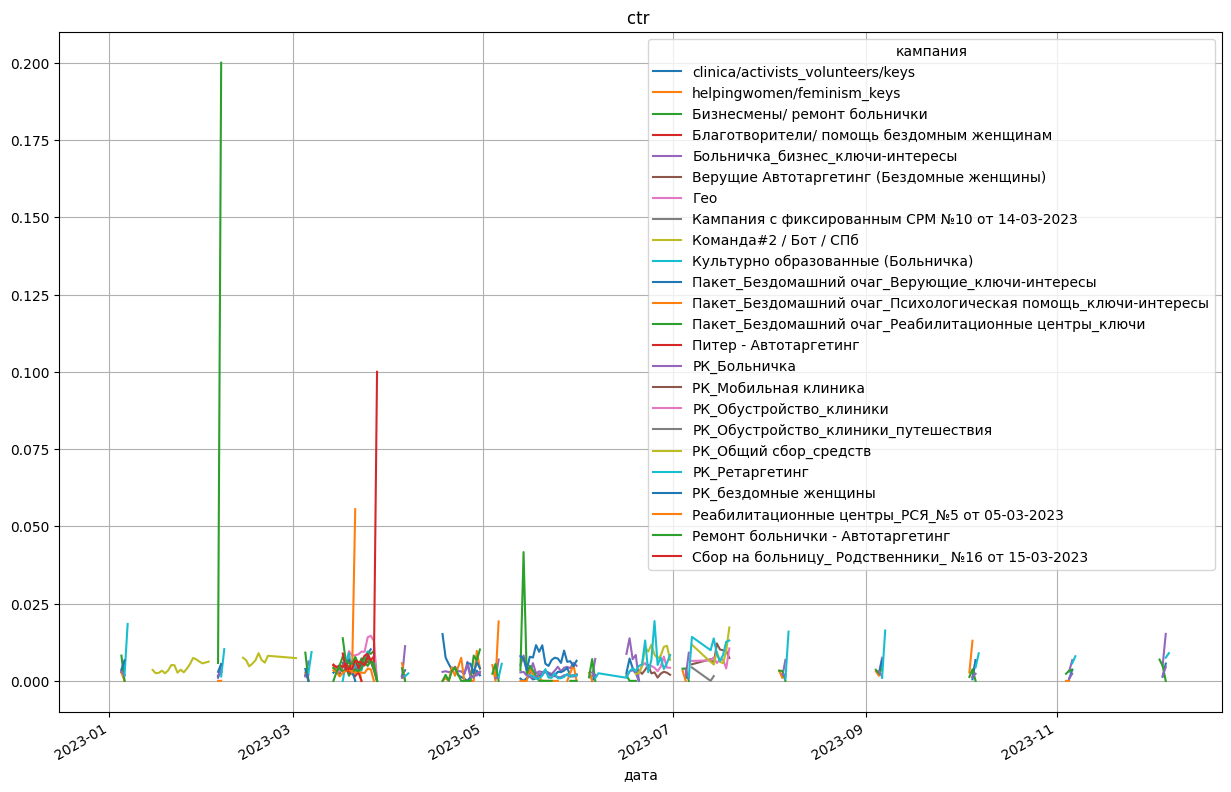

In [ ]:
pd.pivot_table(
    df_ctr, index='кампания', columns='дата', values='ctr', aggfunc='sum'
    ).T.plot(figsize=(15, 10), grid=True, title='ctr ')
plt.show()

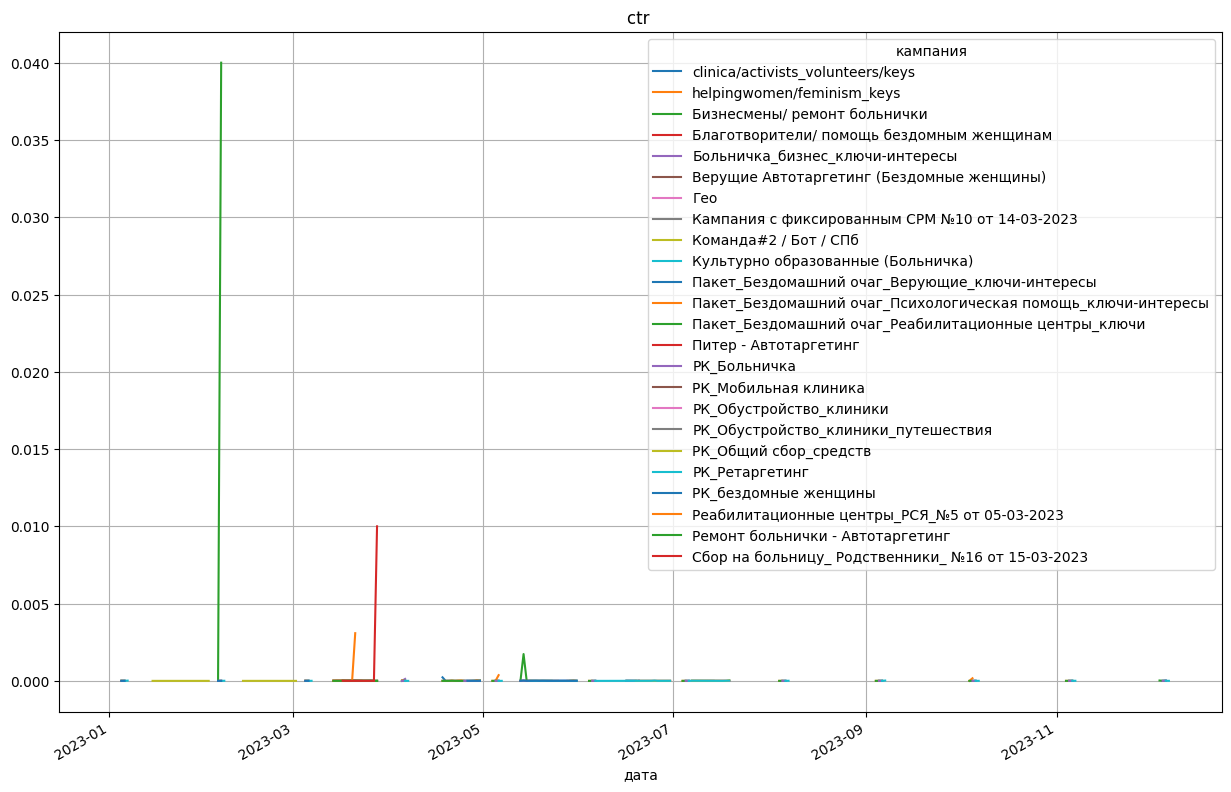

In [ ]:
pd.pivot_table(
    df_ctr, index='кампания', columns='дата', values='wctr', aggfunc='sum'
    ).T.plot(figsize=(15, 10), grid=True, title='ctr ')
plt.show()

In [ ]:
df_ctr.sort_values(by='ctr', ascending=False)

,дата,кампания,показы,клики,взвешенные_показы,ctr,wctr
45,2023-02-06,Пакет_Бездомашний очаг_Реабилитационные центры...,5,1,5.0,0.200000,0.040000
243,2023-03-28,Питер - Автотаргетинг,10,1,10.0,0.100000,0.010000
167,2023-03-21,Реабилитационные центры_РСЯ_№5 от 05-03-2023,18,1,18.0,0.055556,0.003086
358,2023-05-14,Пакет_Бездомашний очаг_Реабилитационные центры...,24,1,24.0,0.041667,0.001736
691,2023-12-04,Гео,309,8,309.0,0.025890,0.000084
...,...,...,...,...,...,...,...
454,2023-05-29,Пакет_Бездомашний очаг_Реабилитационные центры...,2,0,2.0,0.000000,0.000000
460,2023-05-30,Пакет_Бездомашний очаг_Реабилитационные центры...,1,0,1.0,0.000000,0.000000
622,2023-08-06,Пакет_Бездомашний очаг_Реабилитационные центры...,10,0,10.0,0.000000,0.000000
248,2023-03-28,Гео,6,0,6.0,0.000000,0.000000


In [ ]:
df_ctr.describe()

,показы,клики,взвешенные_показы,ctr,wctr
count,709.000000,709.000000,709.000000,709.000000,7.090000e+02
mean,13897.796897,58.170663,13897.796897,0.004953,8.042641e-05
std,25074.843337,115.754967,25074.843337,0.009161,1.553295e-03
min,1.000000,0.000000,1.000000,0.000000,0.000000e+00
25%,2170.000000,10.000000,2170.000000,0.001884,9.588820e-08
50%,6635.000000,26.000000,6635.000000,0.003811,4.222044e-07
75%,14839.000000,51.000000,14839.000000,0.006427,1.413915e-06
max,284367.000000,789.000000,284367.000000,0.200000,4.000000e-02


Вывод:

- только кампания "Пакет_Бездомашний очаг_Реабилитационные центры...	" преодалела границу конверсией в 2%

- стоит отметить что от роста CTR зависит показатель CR, и если увеличить CTR, то это подымет и CR

- От прогнозируемого CTR (помимо других факторов) зависит рейтинг объявления. При прочих равных условиях объявление с более высоким CTR получает более высокий рейтинг. Это означает, что путем повышения кликабельности объявления вы получите больше трафика без лишних затрат.

### 2.2.5 Цена за клик

In [ ]:
df_ad_ch_hospital_2['ср._цена_клика_(руб.)'].describe()

count    307998.000000
mean          1.448495
std           9.358519
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         949.520000
Name: ср._цена_клика_(руб.), dtype: float64

<Axes: >

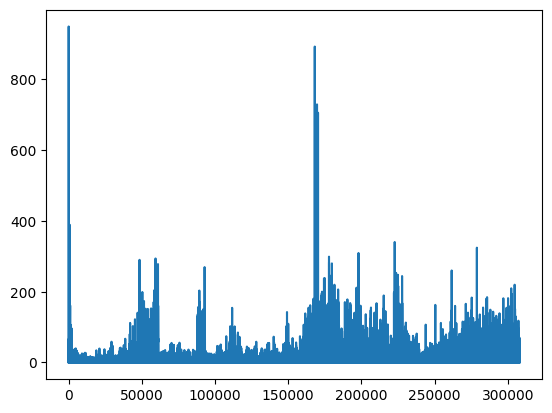

In [ ]:
df_ad_ch_hospital_2['ср._цена_клика_(руб.)'].plot()

In [ ]:
len(df_ad_ch_hospital_2[df_ad_ch_hospital_2['ср._цена_клика_(руб.)'] > 900]) / len(df_ad_ch_hospital_2)

3.2467743297034396e-06

In [ ]:
len(df_ad_ch_hospital_2[df_ad_ch_hospital_2['ср._цена_клика_(руб.)'] > 800]) / len(df_ad_ch_hospital_2)

6.493548659406879e-06

In [ ]:
len(df_ad_ch_hospital_2[df_ad_ch_hospital_2['ср._цена_клика_(руб.)'] > 350]) / len(df_ad_ch_hospital_2)

1.6233871648517198e-05

вывод:
- максимальная цена за клик 949р и это очень много
- средняя цена за клик 1,5р за клик
- необходимо разобраться дорогими кликами, их мало, но они съедают большую часть бюджета

### 2.2.5 Окупаемость инвестиций (ROI)

In [ ]:
df_ad_ch_hospital_2['стоимость_кликов'] = df_ad_ch_hospital_2['ср._цена_клика_(руб.)'] * df_ad_ch_hospital_2['клики']
(df_ad_ch_hospital_2['доход_(руб.)'].sum() - df_ad_ch_hospital_2['стоимость_кликов'].sum()) / df_ad_ch_hospital_2['ср._цена_клика_(руб.)'].sum()

-0.364382986719292

вывод: показатель ROI (-0.36) ниже нуля, что означает что ивестиции в рекламу не окупились

## Выводы по части:
    - нужно учитывать что при объединении пропаает свыше 30%
    - постоянные платежи идут от кампании 'На уставную деятельность и содержание организации'
    - кампания '#Больничкабежит' приносит клиентов только с одним платежом, повторно клиенты платят
    - нужно учитывать что кампания '#Больничкабежит' привела только 2-х клиентов
    - самые большие кампании проходили в январе
    - к концу года объем проводимых кампаний уменьшается
    - "Команда#2 / Бот / СПб", самая большая по объему кампания
    - кампания "Команда#2 / Бот / СПб" больше всего приносит кликов с большим отрывом от других
    - у кампании "Команда#2 / Бот / СПб" так же больше всего показов. Стоит отметить что у остальных компаний заметно меньше показов, а следовательно меньше всего аудитории их видит
    - очень низкая конверсия, средства расходуются не эффективно
    - только кампания "Пакет_Бездомашний очаг_Реабилитационные центры... " преодалела границу конверсией в 2%
    - стоит отметить что от роста CTR зависит показатель CR, и если увеличить CTR, то это подымет и CR
    - максимальная цена за клик 949р и это очень много
    - средняя цена за клик 1,5р за клик
    - необходимо разобраться дорогими кликами, их мало, но они съедают большую часть бюджета
    - показатель ROI (-0.36) ниже нуля, что означает что инвестиции в рекламу не окупились


# Выводы и рекомендации

**Выводы:**
- Инвестиции в рекламу не окупаются.
- Низкий показатель кликабельности
- Стоит отметь что по показам с отрывом лидирует одна компания "Команда#2 / Бот / СПб"
- после 15 платежей клиенты все теряются
- минимальное кол-во платежей которые совершают пользователи - 6 раз
- максимальное кол-во платежей жертователя - 23 раза
- карта, терминал и спб чаще всего используются во время всех платежей
- самая популярная общая сумма пожертований до 300р в общем для всех групп
- самая популярная общая сумма пожертований для постоянных жертователей составляет от 1200 до 55000р
- самая не популярная сумма для всех групп от 300 до 600р, от 600 до 1200 для постоянных и от 1200 до 55000р для разовых
- лидеры по пожертвованиям Россия и США
- лидеры по пожертвованиям среди регионов СПб и Кунене(Россия)
- наибольшее количество платежей из России.
- больше всего платежей приходят из СПб и Ленинградской области. Стоит отметить так же Мск и Кунене

**Причины и рекомендации:**
- Одной из причин является клики с очень высокой стоимостью. В системе Яндекс контекст можно настроить ограничение на максимальную стоимость клика, это поможет избежать подобных случаев
- Нужно проверить настройку рекламных компаний т.к. Кроме одной компании, у остальных очень низкий уровень показов.
- Стоит проанализирует региональную принадлежность клиентов, это связано с настройкой контекста или разобраться с причинами почему привлекаются пользователи только из двух регионов: Мск и СПб
- Необходимо рассмотреть способы увеличить привлечение клиентов из других стран и регионов